<a href="https://colab.research.google.com/github/giramos/Machine-Learning/blob/master/Sesion03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales 1
## 2 Perceptrón
En las dos sesiones de Aprendizaje Automático vimos los algoritmos de KNN y de Árboles de Decisión. El primero clasificaba instancias según las que fuesen más cercanas y el segundo aplicando una serie de reglas que determinan la clase resultante. El perceptrón actúa de forma diferente: la predicción se obtiene a partir de combinaciones lineales de los atributos de las instancias.

El Perceptrón tiene una estructura sencilla (Figure 1) basada en un vector de pesos W
: para cada característica de entrada xi
 se asocia un peso wi
 y además se tiene un peso adicional b
 llamado bias/sesgo:
 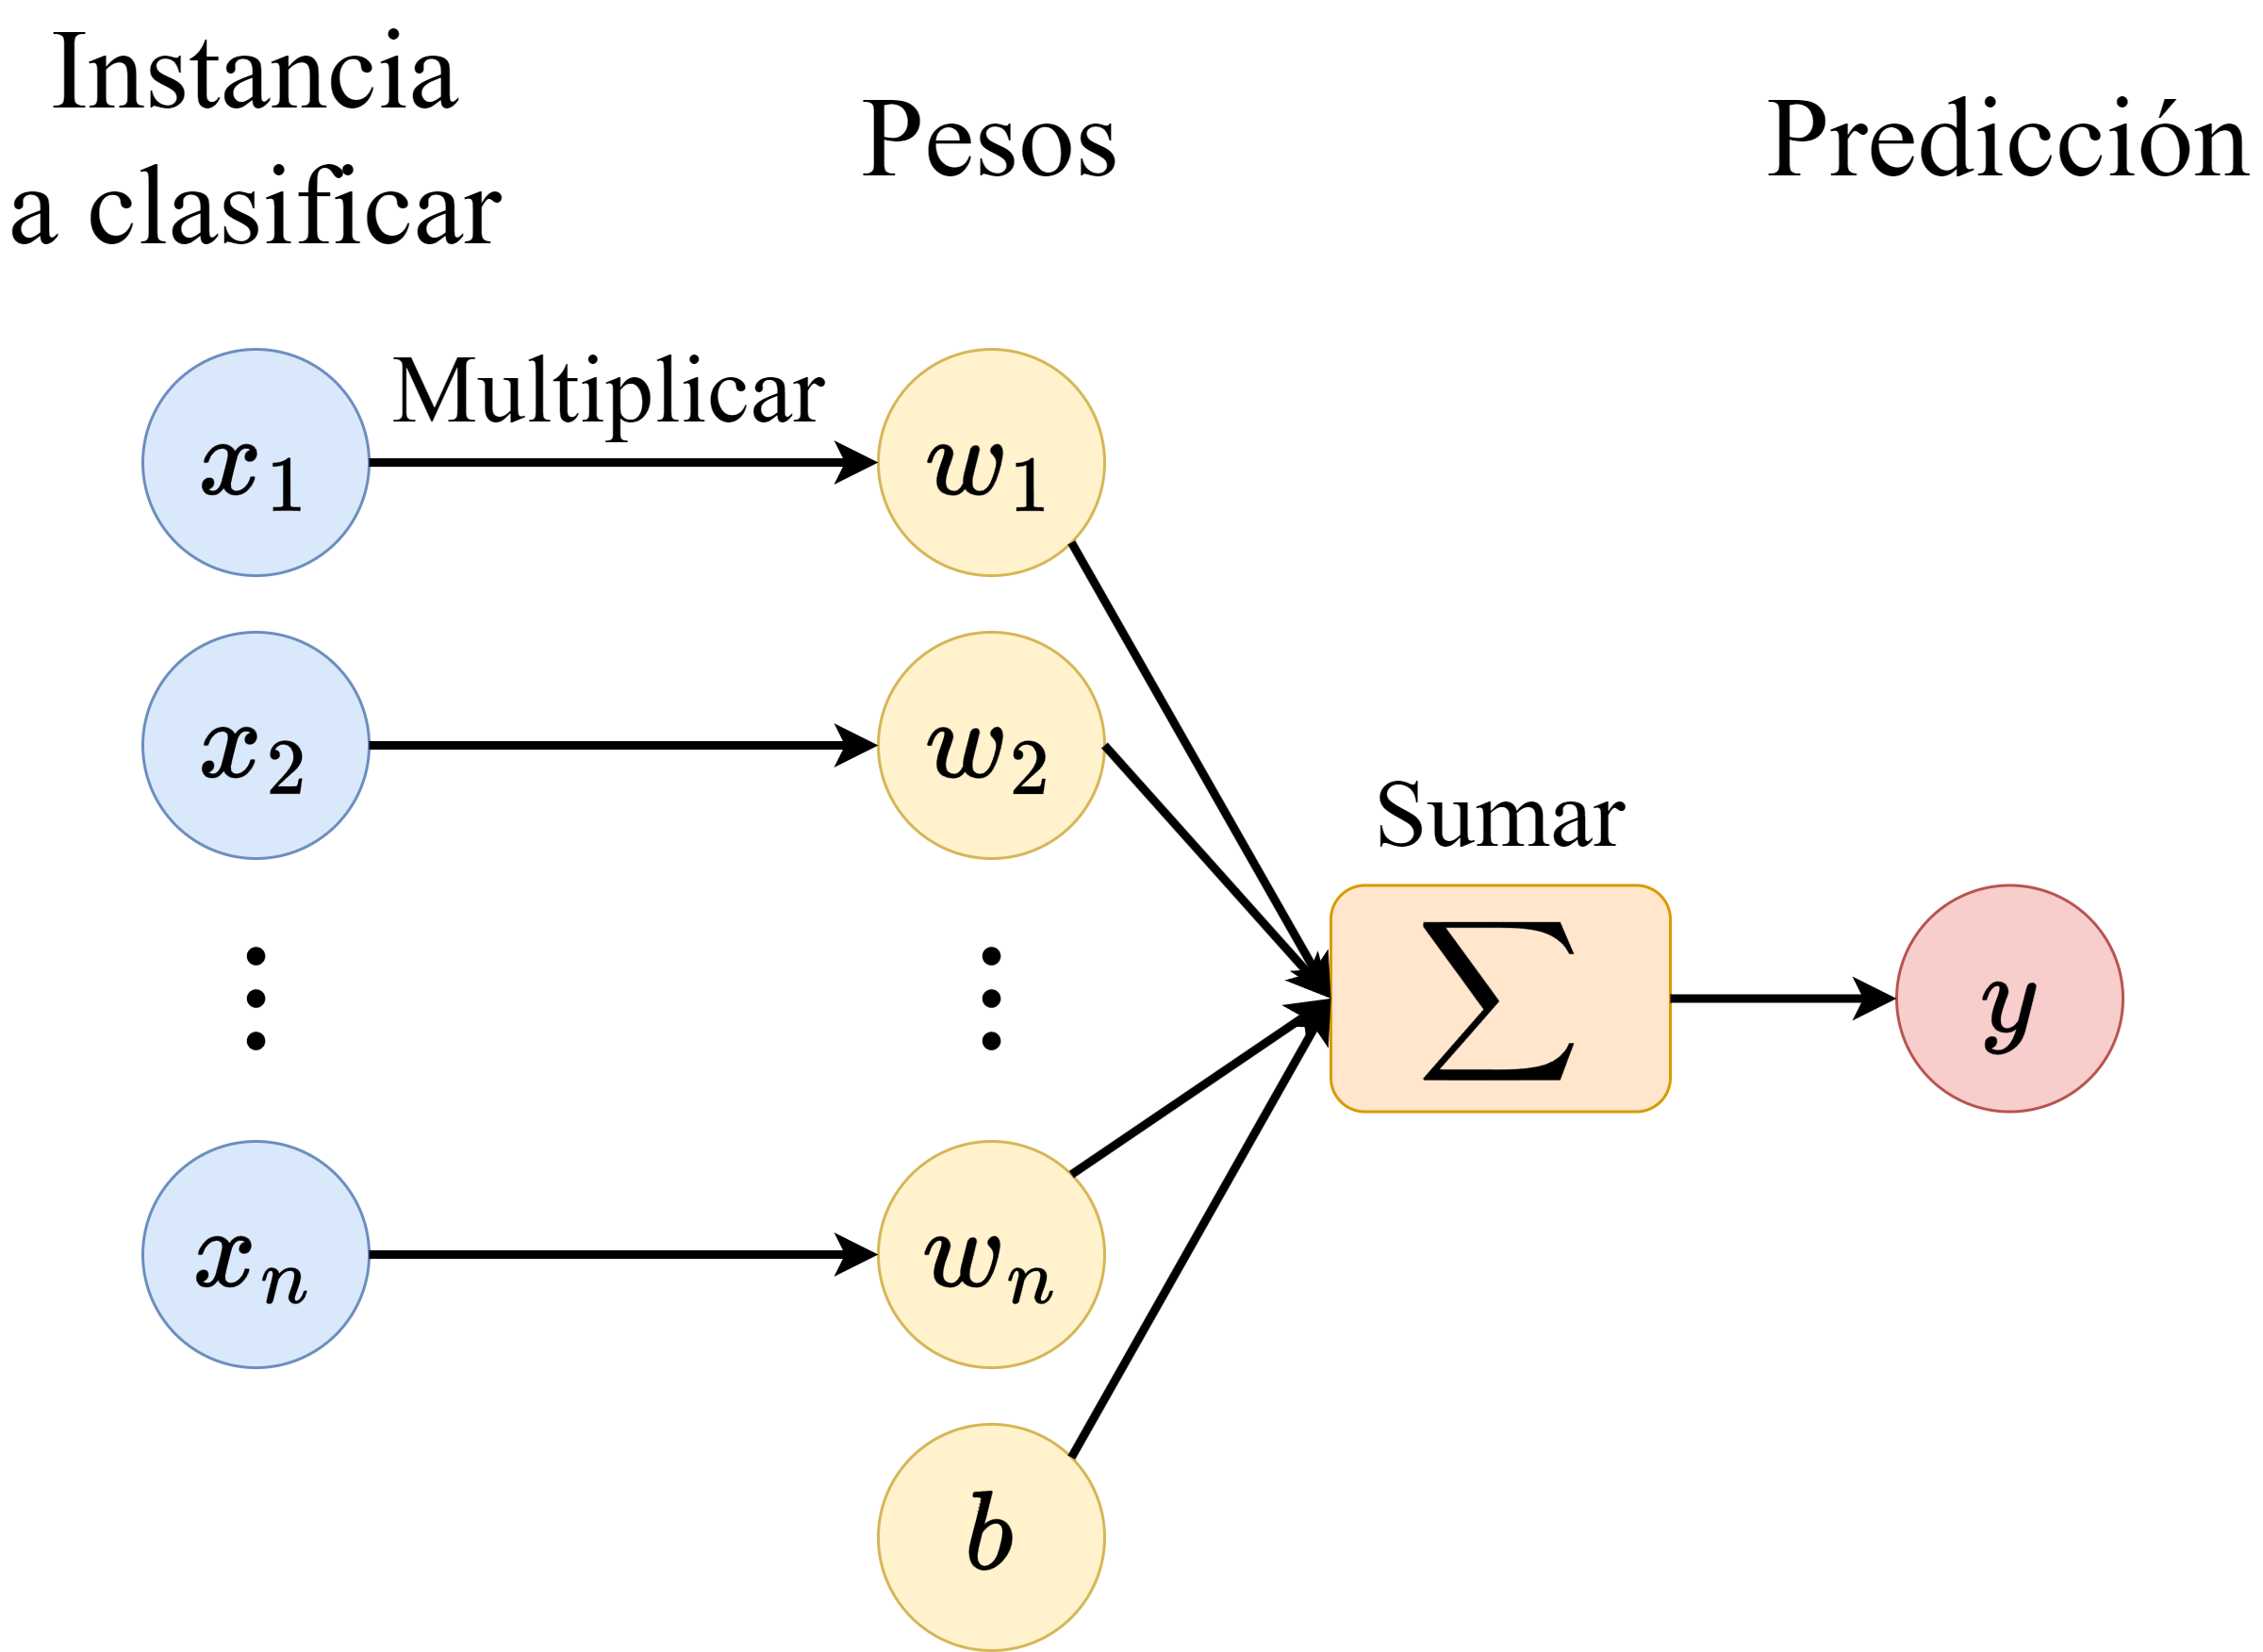
 Figure 1: Estructura del Perceptrón.
Cuando tengamos una instancia X
, el valor de la clase se predice acorde a la siguiente fórmula:

 <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">{</mo>
    <mtable columnalign="left left" columnspacing="1em" rowspacing=".2em">
      <mtr>
        <mtd>
          <mn>1</mn>
        </mtd>
        <mtd>
          <mtext>si&#xA0;</mtext>
          <munderover>
            <mo data-mjx-texclass="OP">&#x2211;</mo>
            <mrow data-mjx-texclass="ORD">
              <mi>i</mi>
              <mo>=</mo>
              <mn>1</mn>
            </mrow>
            <mrow data-mjx-texclass="ORD">
              <mi>n</mi>
            </mrow>
          </munderover>
          <msub>
            <mi>w</mi>
            <mi>i</mi>
          </msub>
          <msub>
            <mi>x</mi>
            <mi>i</mi>
          </msub>
          <mo>+</mo>
          <mi>b</mi>
          <mo>&gt;</mo>
          <mn>0</mn>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mn>0</mn>
        </mtd>
        <mtd>
          <mtext>en otro caso</mtext>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE" fence="true" stretchy="true" symmetric="true"></mo>
  </mrow>
</math>

Donde:

 y es la salida (predicción) del perceptrón.
 wi son los pesos asociados a cada entrada
.
 b es el sesgo (bias).
 n es el número de características de entrada.
NOTA:¿Qué es una combinación lineal?
Una combinación lineal es una operación matemática que consiste en multiplicar cada elemento de un vector por un escalar (una constante) y sumar los resultados.

## 2.1 Ejemplo sencillo
Veamos un ejemplo con el dataset de personas:

In [1]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos02b_train.csv")

# Separar las variables (X) de las etiquetas (y)
X_train = df[["Peso", "Estatura"]]
y_train = df["ActividadFisica"]

dict_clases = {0: "Alta", 1: "Baja"}

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Peso      1500 non-null   float64
 1   Estatura  1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [2]:
# Mostrar la primera fila del DataFrame resultante
print("Estos son los datos de una persona:")
print(X_train.head(1))

print("\nY esta es su actividad física (su etiqueta real):")
print(dict_clases[y_train.iloc[0]])

Estos son los datos de una persona:
   Peso  Estatura
0  80.1     172.5

Y esta es su actividad física (su etiqueta real):
Alta


Nuestro perceptrón funcionaría así:
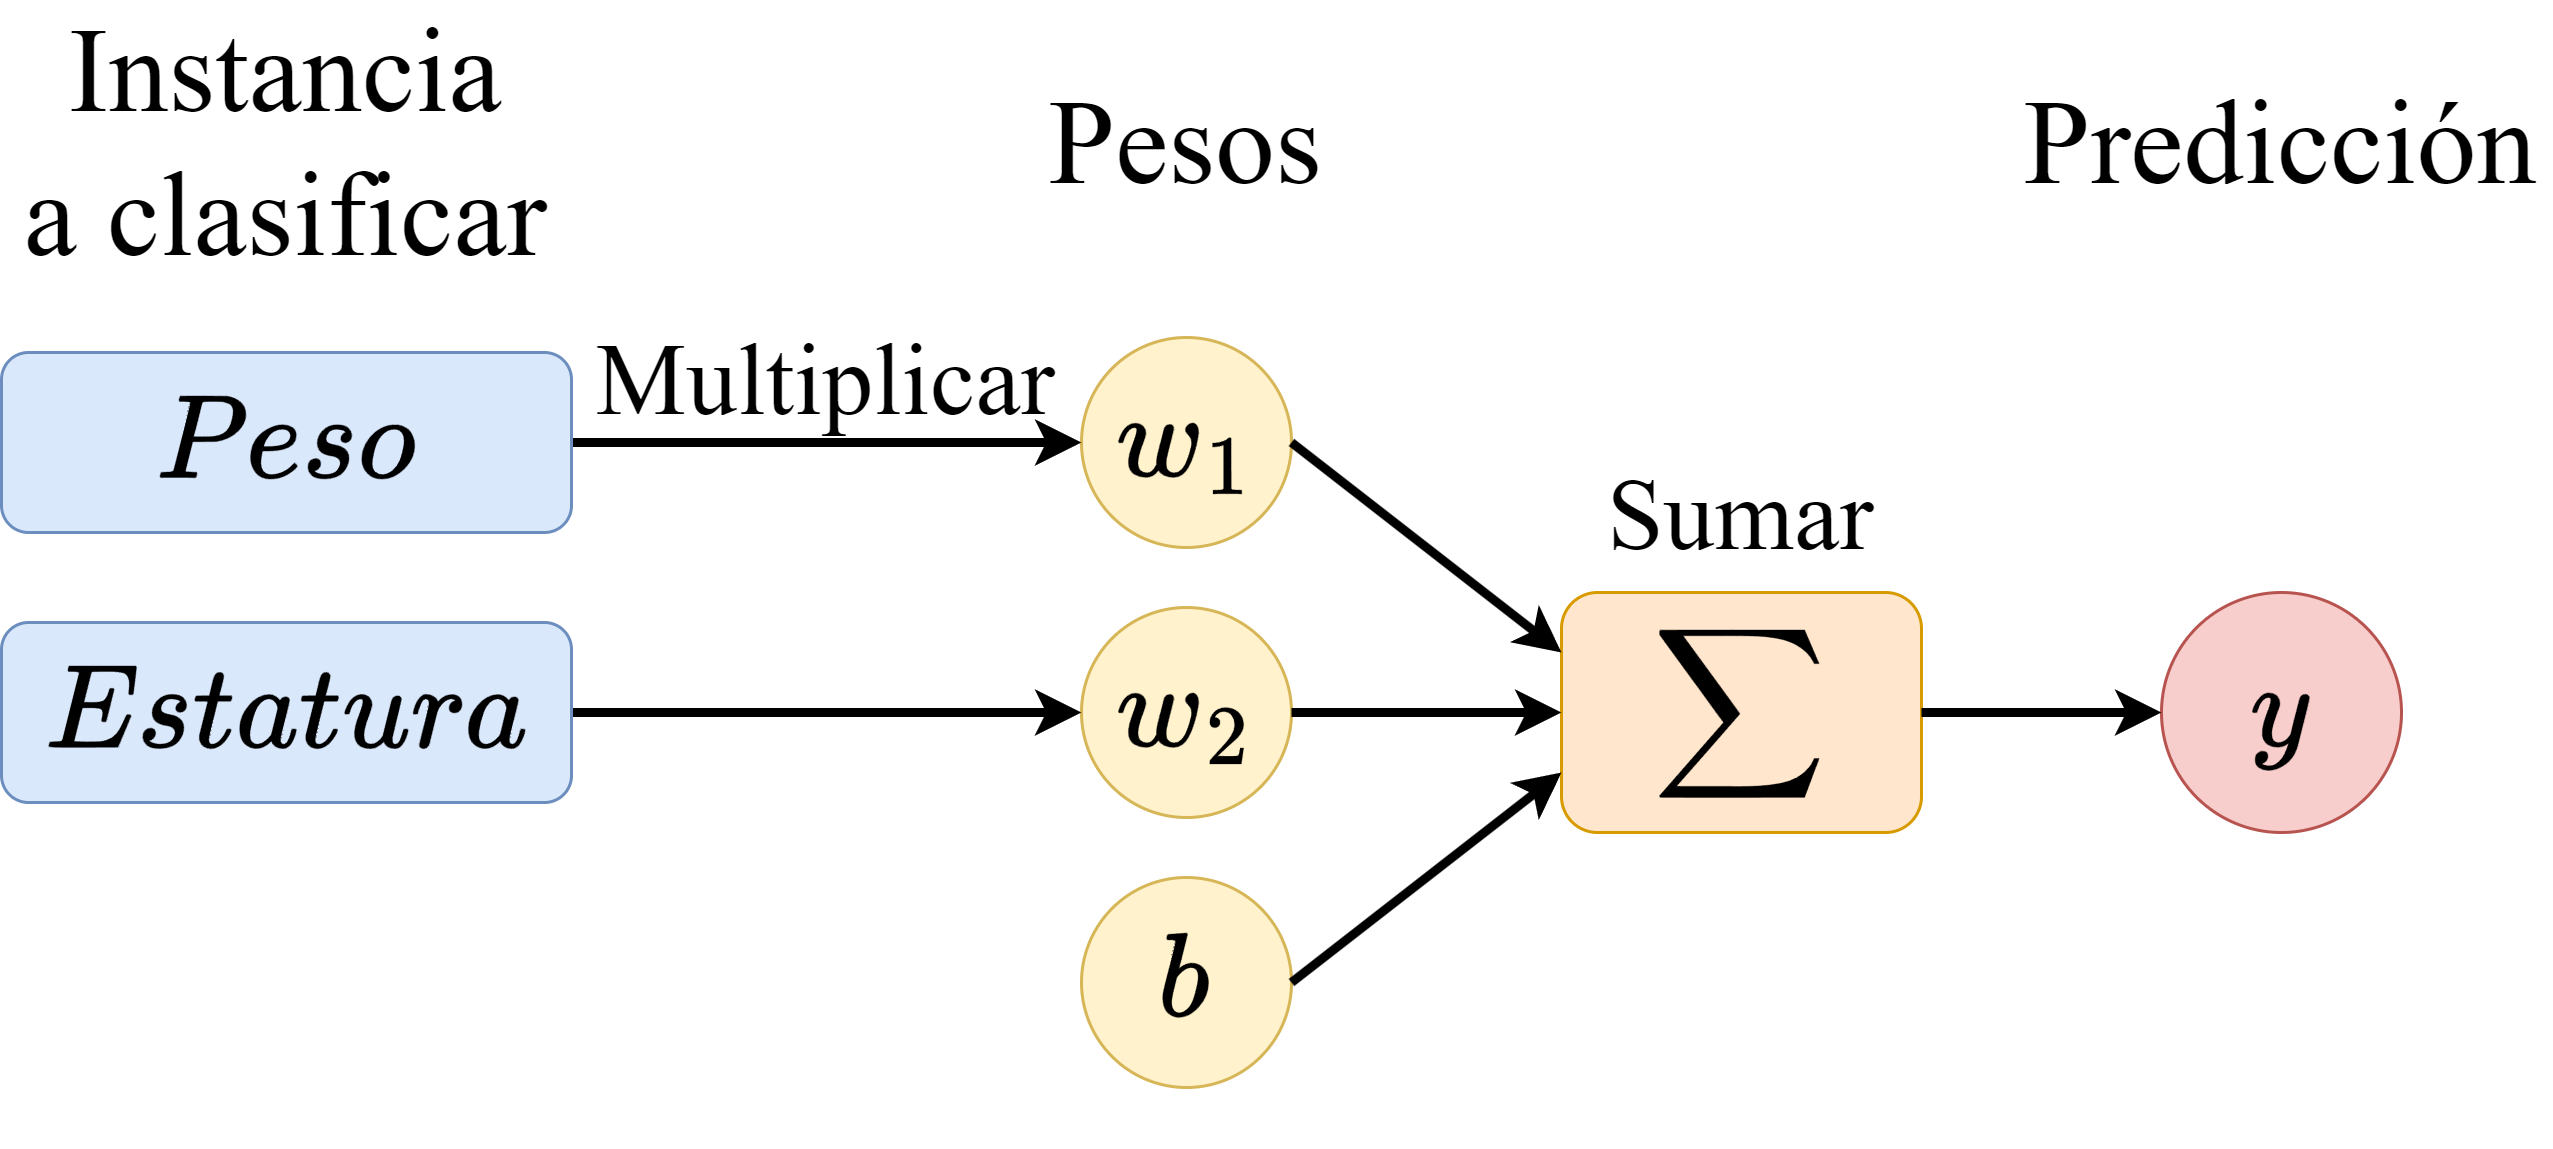
Figure 2: Perceptrón para el dataset 02b.
Imaginamos que tenemos el siguiente vector de pesos
 y bias
:W = [0.1, -0.05]
b = 0.1
La predicción sería:

In [3]:
import numpy as np

def compute_neuron_perceptron(X: np.array, W: np.array, b: float) -> int:
  return ((np.dot(X, W) + b) > 0).astype(int)

W = [0.1, 0.05]
b = 0.1

# Calcular la predicción
y_pred = compute_neuron_perceptron(X_train.iloc[0], W, b)

print(f"La predicción es: Actividad física {dict_clases[y_pred]}")

La predicción es: Actividad física Baja


La predicción está mal, porque su etiqueta real es Alta. Para modificar esto, se entrena el modelo. Durante el entrenamiento de un perceptrón, modificamos los pesos según los errores que hayamos cometido:
w_i = w_i + \text{tasa de aprendizaje} \cdot x_i \cdot (y_{\text{real}} - y_{\text{predicha}})
Donde:
 w_i se actualiza para cada característica de entrada.
 y_{\text{real}} es la etiqueta real del ejemplo de entrenamiento.
 y_{\text{predicha}} es la predicción del perceptrón.

 El sesgo también se actualiza de manera similar:
 b = b + \text{tasa de aprendizaje} \cdot (y_{\text{real}} - y_{\text{predicha}})
 En nuestro caso haríamos la siguiente actualización:

In [4]:
def update_weights(
    W: np.array, b: float, X: np.array, y_real: np.array, y_pred: np.array, learning_rate: float, verbose: bool = True
):
    X = np.array(X)
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)

    W = np.array(W).copy()

    # Actualizar los pesos
    for w in range(len(W)):
        if verbose:
            print(f"W_{w} = {W[w]}\t+ {learning_rate} * {np.mean(X, axis=0)[w]:.3f} * ({np.mean(y_real)} - {np.mean(y_pred)})")
        W[w] = W[w] + learning_rate * np.mean(X, axis=0)[w] * np.mean(y_real - y_pred)

    # Actualizar el sesgo
    if verbose:
        print(f"b   = {b}\t+ {learning_rate} * ({np.mean(y_real)} - {np.mean(y_pred)})")
    b = b + learning_rate * np.mean(y_real - y_pred)

    return W, b


learning_rate = 0.1  # Tasa de aprendizaje
y_real = y_train.iloc[0]

print("\nPesos antiguos:")
print(np.round(W, decimals=3))
print(f"{b:.3f}")

# Actualizar los pesos y el sesgo
W, b = update_weights(W, b, [X_train.iloc[0]], y_real, y_pred, learning_rate)

print("\nNuevos pesos y sesgo:")
print(np.round(W, decimals=3))
print(f"{b:.3f}")


Pesos antiguos:
[0.1  0.05]
0.100
W_0 = 0.1	+ 0.1 * 80.100 * (0.0 - 1.0)
W_1 = 0.05	+ 0.1 * 172.500 * (0.0 - 1.0)
b   = 0.1	+ 0.1 * (0.0 - 1.0)

Nuevos pesos y sesgo:
[ -7.91 -17.2 ]
0.000


Ahora si volvemos a hacer la predicción con los nuevos pesos y sesgo, obtenemos:

In [5]:
# Calcular la nueva predicción
y_pred = int((np.dot(W, X_train.iloc[0]) + b) > 0)

print(f"La predicción es: Actividad física {dict_clases[y_pred]}")

La predicción es: Actividad física Alta


### 2.2 Ejemplo sencillo con un dataset
Entrenar un Percetrón implica repetir este proceso con los ejemplo de entrenamiento, modificando los pesos sucesivamente.

Ver el código para fijar semillas aleatorias con set_random_seeds()

In [6]:
from numpy.random import seed as np_seed
from tensorflow.random import set_seed as tf_set_seed
import random
from keras.utils import set_random_seed as keras_set_seed


# Fijar semillas aleatorias para resultados reproducibles
def set_random_seeds(seed: int = 0):
    np_seed(seed)
    tf_set_seed(seed)
    random.seed(seed)
    keras_set_seed(seed)

Ver el código de visualizar_datos()

In [9]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

colors = {0: "#4A249D", 1: "#0D7C66"}

def visualizar_datos(df_datos: pd.DataFrame, df_labels: pd.DataFrame, title: str, x_label: str, y_label: str, legend_dict: dict = None, new_point: np.ndarray = None) -> tuple:
    if isinstance(df_datos, pd.DataFrame):
        df_datos = df_datos.to_numpy()

    if isinstance(df_labels, pd.DataFrame):
        df_labels = df_labels.to_numpy()

    fig, ax = plt.subplots(figsize=(5,5))

    # Visualizar los puntos de entrenamiento
    ax.scatter(df_datos[:, 0], df_datos[:, 1], c=[colors[c] for c in df_labels],
        s=100,
        edgecolor="k",
    )

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    if new_point is not None:
        ax.scatter(new_point[0], new_point[1], color="red", marker="*", s=200, label="Nueva persona")

    if legend_dict is not None:
        legend_elements = [
            Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[0], markersize=10, label=legend_dict[0]),
            Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[1], markersize=10, label=legend_dict[1]),
        ]

        if new_point is not None:
            legend_elements.append(Line2D([0], [0], marker="*", color="w", markerfacecolor="red", markersize=10, label="Nuevo punto"))

        plt.legend(handles=legend_elements)

    plt.show()

    return ax.get_xlim(), ax.get_ylim()

<ipython-input-10-a2ec4de0e020>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[y_train == 0] = X_train.loc[y_train == 0] + 30


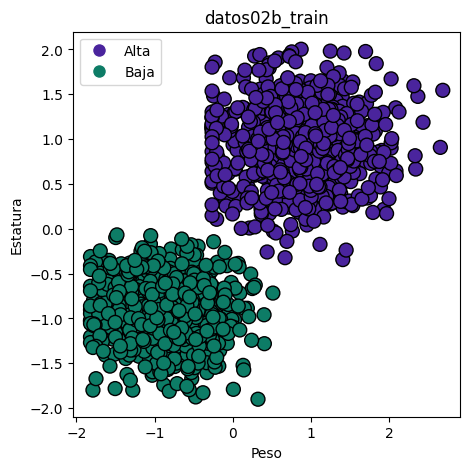

In [10]:
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos02b_train.csv")

# Separar las variables (X) de las etiquetas (y)
X_train = df[["Peso", "Estatura"]]
y_train = df["ActividadFisica"]

X_train.loc[y_train == 0] = X_train.loc[y_train == 0] + 30

# Estandarizar los datos
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=["Peso", "Estatura"])

x_range, y_range = visualizar_datos(X_train, y_train, "datos02b_train", "Peso", "Estatura", dict_clases)

En sklearn tenemos la clase Perceptron que implementa el algoritmo del perceptrón. Vamos a entrenar un modelo con este algoritmo y ver cómo va cambiando la frontera de decisión a medida que se entrena.

Ver el código de visualizar_predicciones_perceptron()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
from matplotlib.colors import ListedColormap
import warnings

def visualizar_predicciones_perceptron(X_test: pd.DataFrame, y_test: pd.DataFrame, y_pred: np.ndarray, title: str,
                                       x_label: str, y_label: str, legend_dict: dict = None,
                                       x_range: list = None, y_range: list = None, fig_size: tuple = (4,4)) -> None:

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=fig_size)

    # Generar colores para las predicciones
    colors = ["#4A249D", "#0D7C66"]  # Cambia estos colores según tus clases si es necesario

    # Visualizar los puntos de prueba y destacar errores con borde rojo
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=[colors[c] for c in y_pred],
               s=100,
               edgecolor=[colors[y_pred[i]] if y_pred[i] == y_test.iloc[i] else "r" for i in range(len(y_pred))],
               linewidths=2)

    # Añadir la frontera de decisión
    x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
    y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Obtener las predicciones del modelo para cada punto en la malla
    with warnings.catch_warnings(record=True) as w:
      Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar la frontera de decisión como un contorno de color
    ax.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap(colors))

    # Configurar etiquetas y título
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    # Ajustar rango de los ejes si se proporciona
    if x_range is not None:
        ax.set_xlim(x_range)
    if y_range is not None:
        ax.set_ylim(y_range)

    # Añadir la leyenda si se proporciona
    if legend_dict is not None:
        legend_elements = [
            Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[0], markersize=10, label=legend_dict[0]),
            Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[1], markersize=10, label=legend_dict[1]),
        ]
        plt.legend(handles=legend_elements)

    plt.show()

Época 1


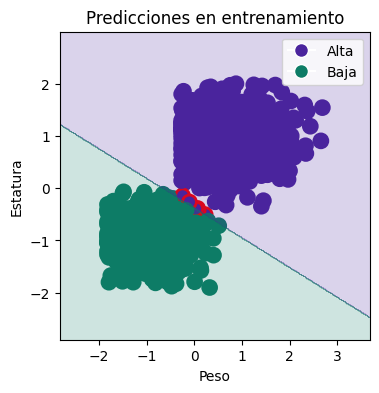

Época 2


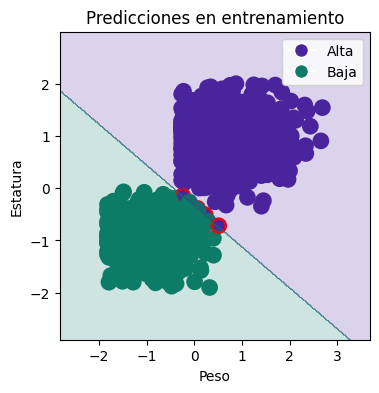

Época 3


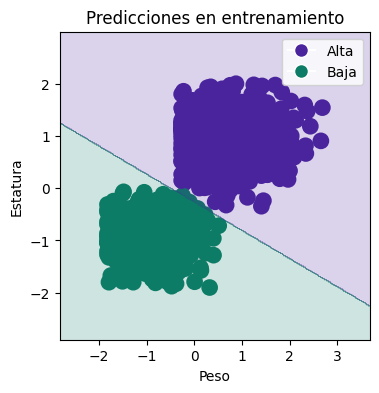

El accuracy del modelo es: 1.00


In [12]:
from sklearn.linear_model import Perceptron

set_random_seeds(10)

perceptron = Perceptron(max_iter=1, tol=None, eta0=0.01, random_state=0, warm_start=True)

for i in range(3):
    # Entrenar el modelo
    perceptron.fit(X_train, y_train)

    # Predecir las etiquetas de los datos de entrenamiento
    y_pred = perceptron.predict(X_train)

    print(f"Época {i+1}")

    visualizar_predicciones_perceptron(
        X_train, y_train, y_pred, "Predicciones en entrenamiento", "Peso", "Estatura", dict_clases
    )

# Medir accuracy
accuracy = perceptron.score(X_train, y_train)
print(f"El accuracy del modelo es: {accuracy:.2f}")

### 2.3 Limitaciones del perceptrón
El perceptrón tiene limitaciones importantes: por ejemplo, **no puede aprender funciones no lineales**. Si los datos no son linealesmente separables, el perceptrón no podrá encontrar una frontera de decisión que separe correctamente las clases.

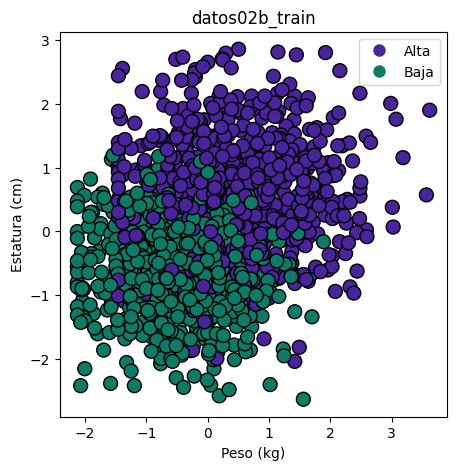

Época 1


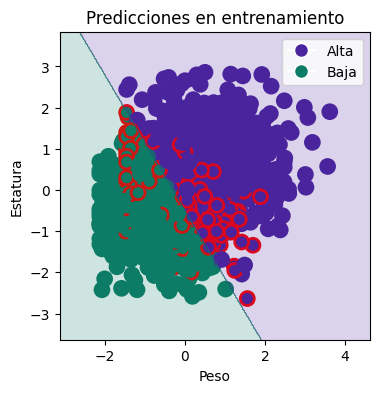

Época 2


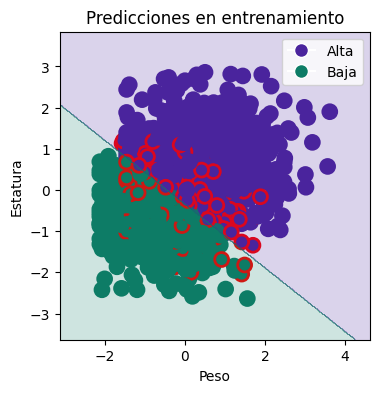

Época 3


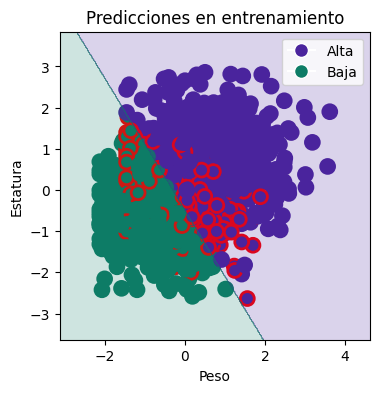

Época 4


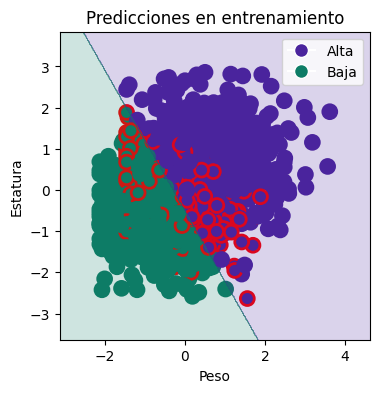

Época 5


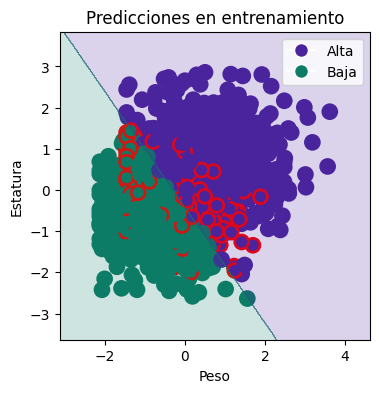

In [13]:
# Cargar el conjunto de datos
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos02b_train.csv")

# Separar las variables (X) de las etiquetas (y)
X_train = df[["Peso", "Estatura"]]
y_train = df["ActividadFisica"]

# Estandarizar los datos
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=["Peso", "Estatura"])

x_range, y_range = visualizar_datos(X_train, y_train, "datos02b_train", "Peso (kg)", "Estatura (cm)", dict_clases)

perceptron = Perceptron(max_iter=1, tol=None, eta0=0.01, random_state=0, warm_start=True)

for i in range(5):
  # Entrenar el modelo
  perceptron.fit(X_train, y_train)

  # Predecir las etiquetas de los datos de entrenamiento
  y_pred = perceptron.predict(X_train)

  print(f"Época {i+1}")

  visualizar_predicciones_perceptron(X_train, y_train, y_pred, "Predicciones en entrenamiento",  "Peso", "Estatura", dict_clases)

Las redes neuronales son una extensión del perceptrón que permiten aprender funciones más complejas. En la siguiente sesión veremos cómo funcionan y cómo entrenarlas.

## 3 Introducción a keras
El paquete keras es una API de alto nivel para construir y entrenar redes neuronales. keras permite definir modelos de redes neuronales de forma sencilla y flexible, y proporciona una interfaz intuitiva para entrenar y evaluar modelos. Podemos crear un perceptrón con keras, pero también podemos crear redes neuronales mucho más complejas, con múltiples capas y muchas más neuronas.

La clase Sequential de keras permite definir modelos de redes neuronales secuenciales, donde las capas se apilan una encima de la otra. Hay diferentes tipos de capas; una de los principales son las capas densas: Dense. Cada neurona de la capa densa está conectada con todas las neuronas de la capa anterior: es decir, el perceptrón es una red neuronal con una única capa densa con una única neurona:
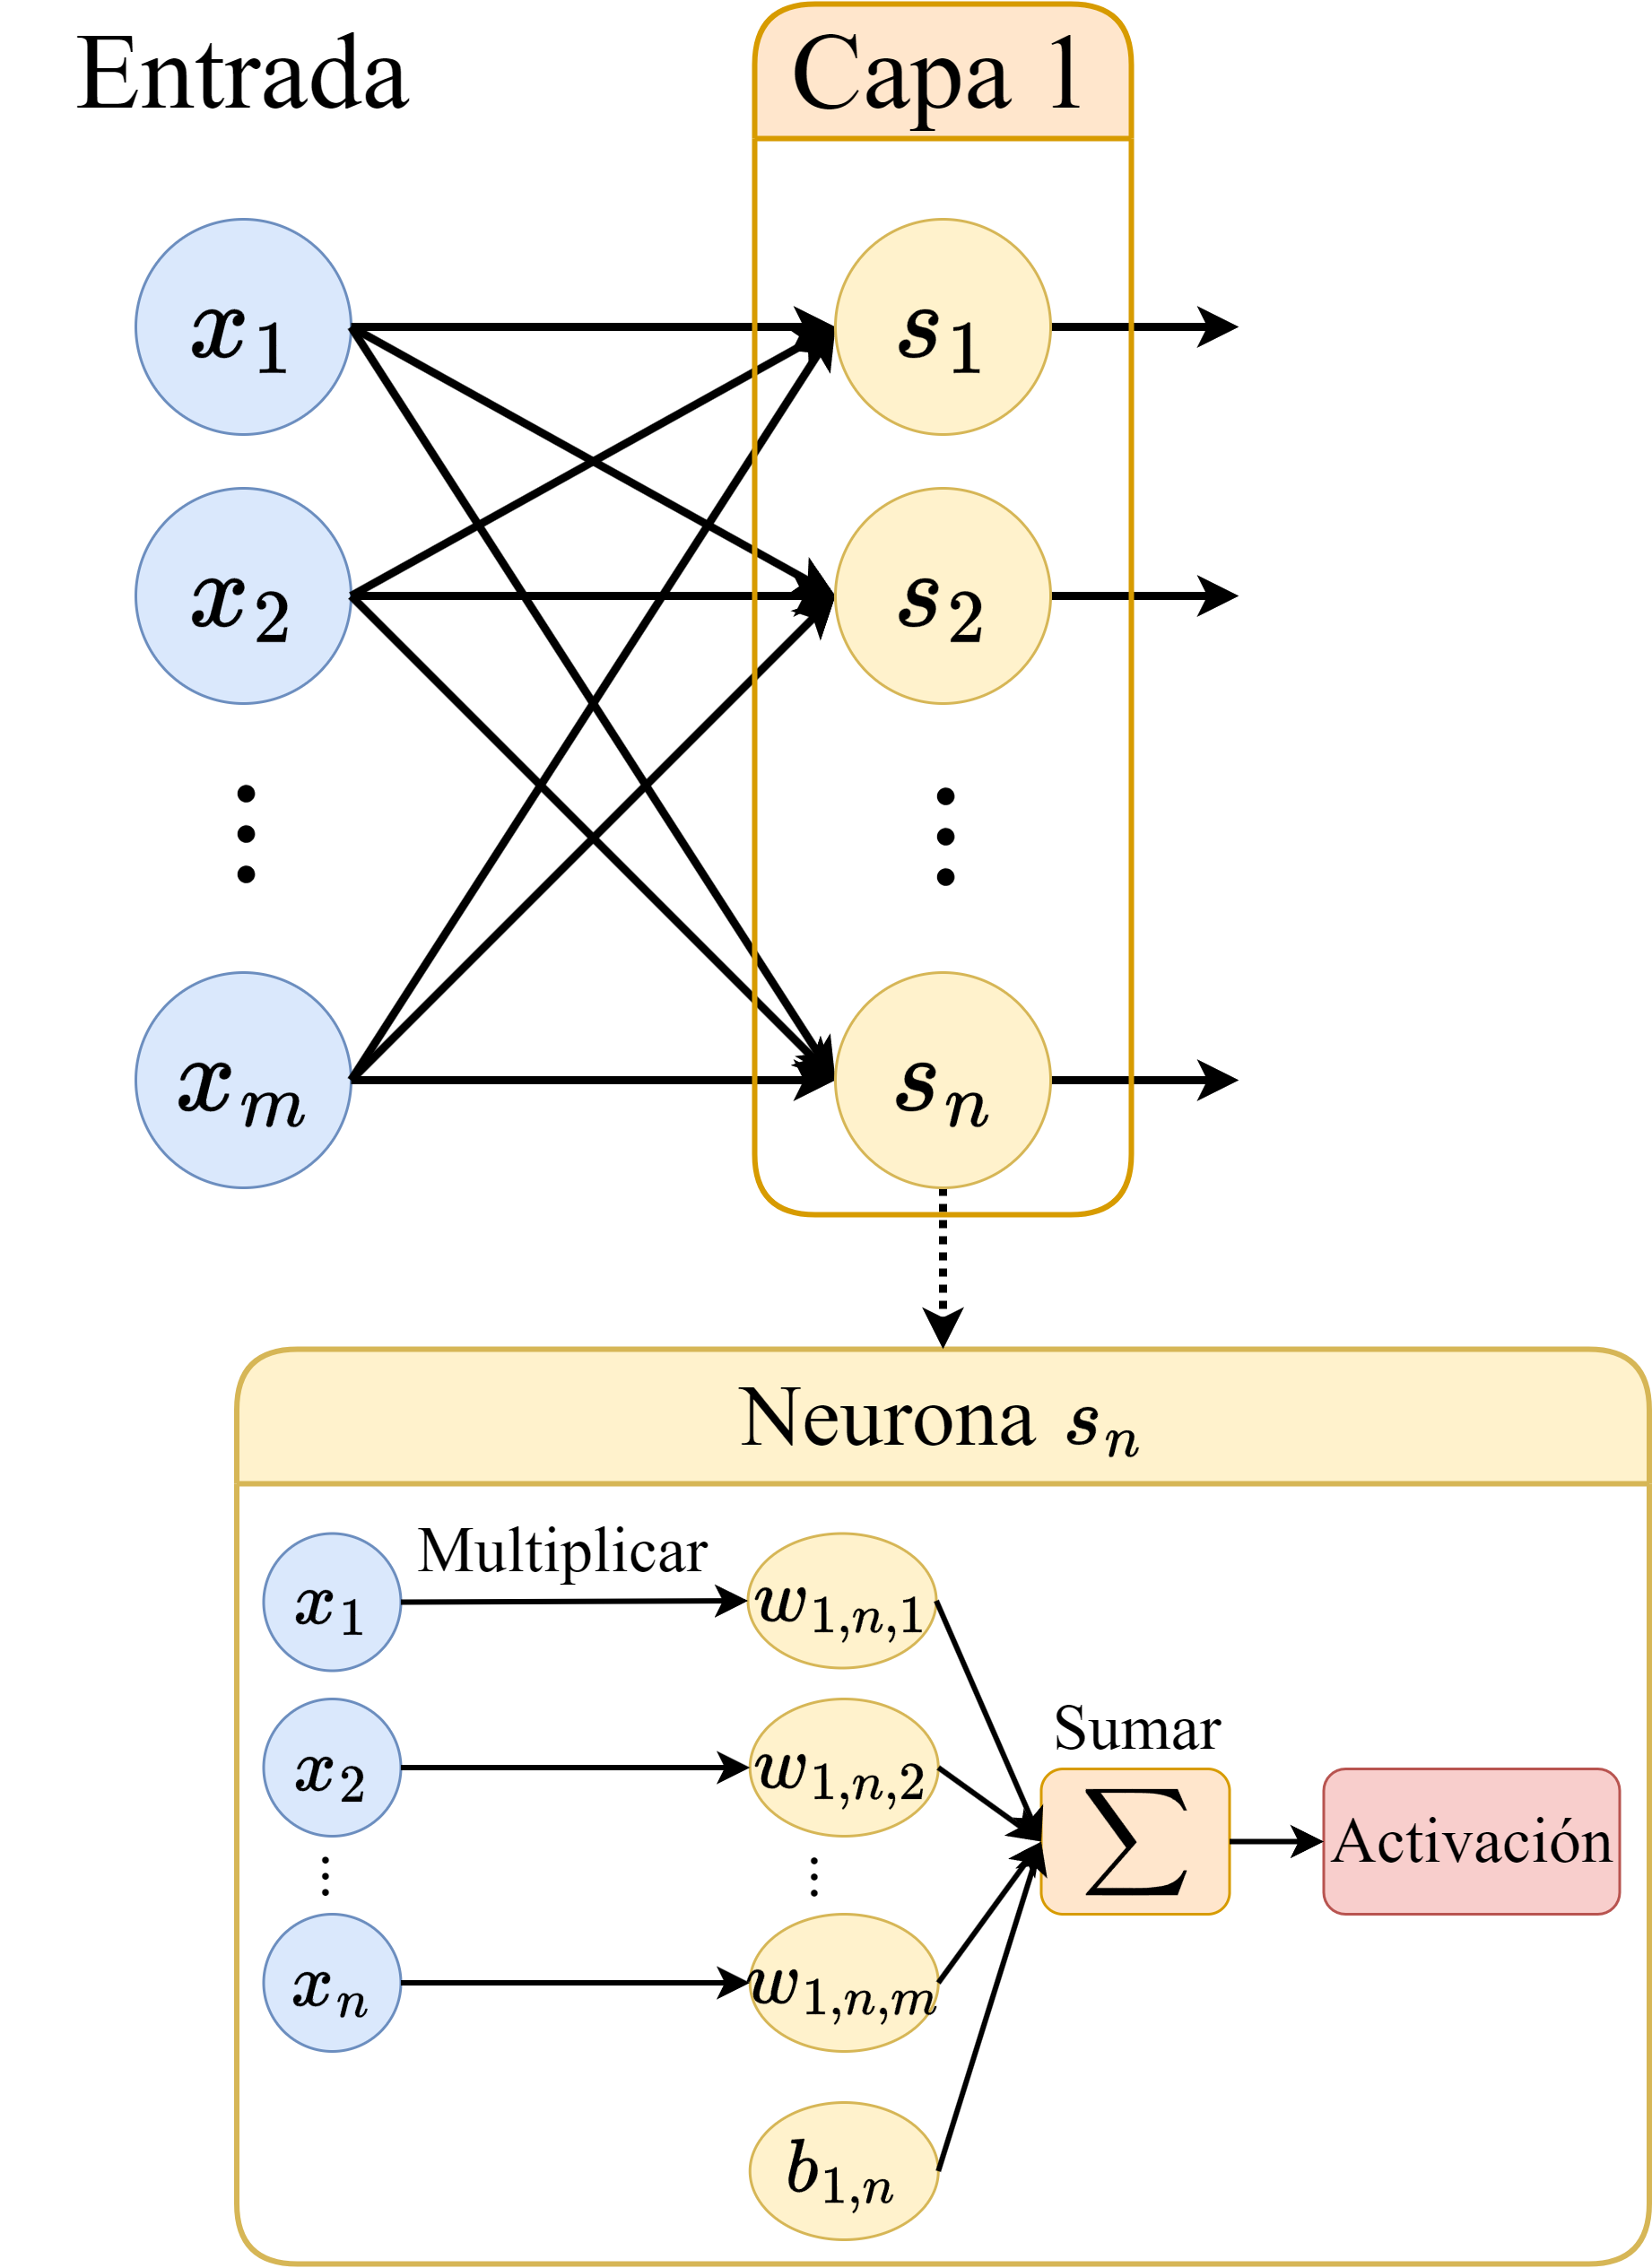
Figure 3: Capa densa.
Y un modelo secuencial es la unión de múltiples capas:
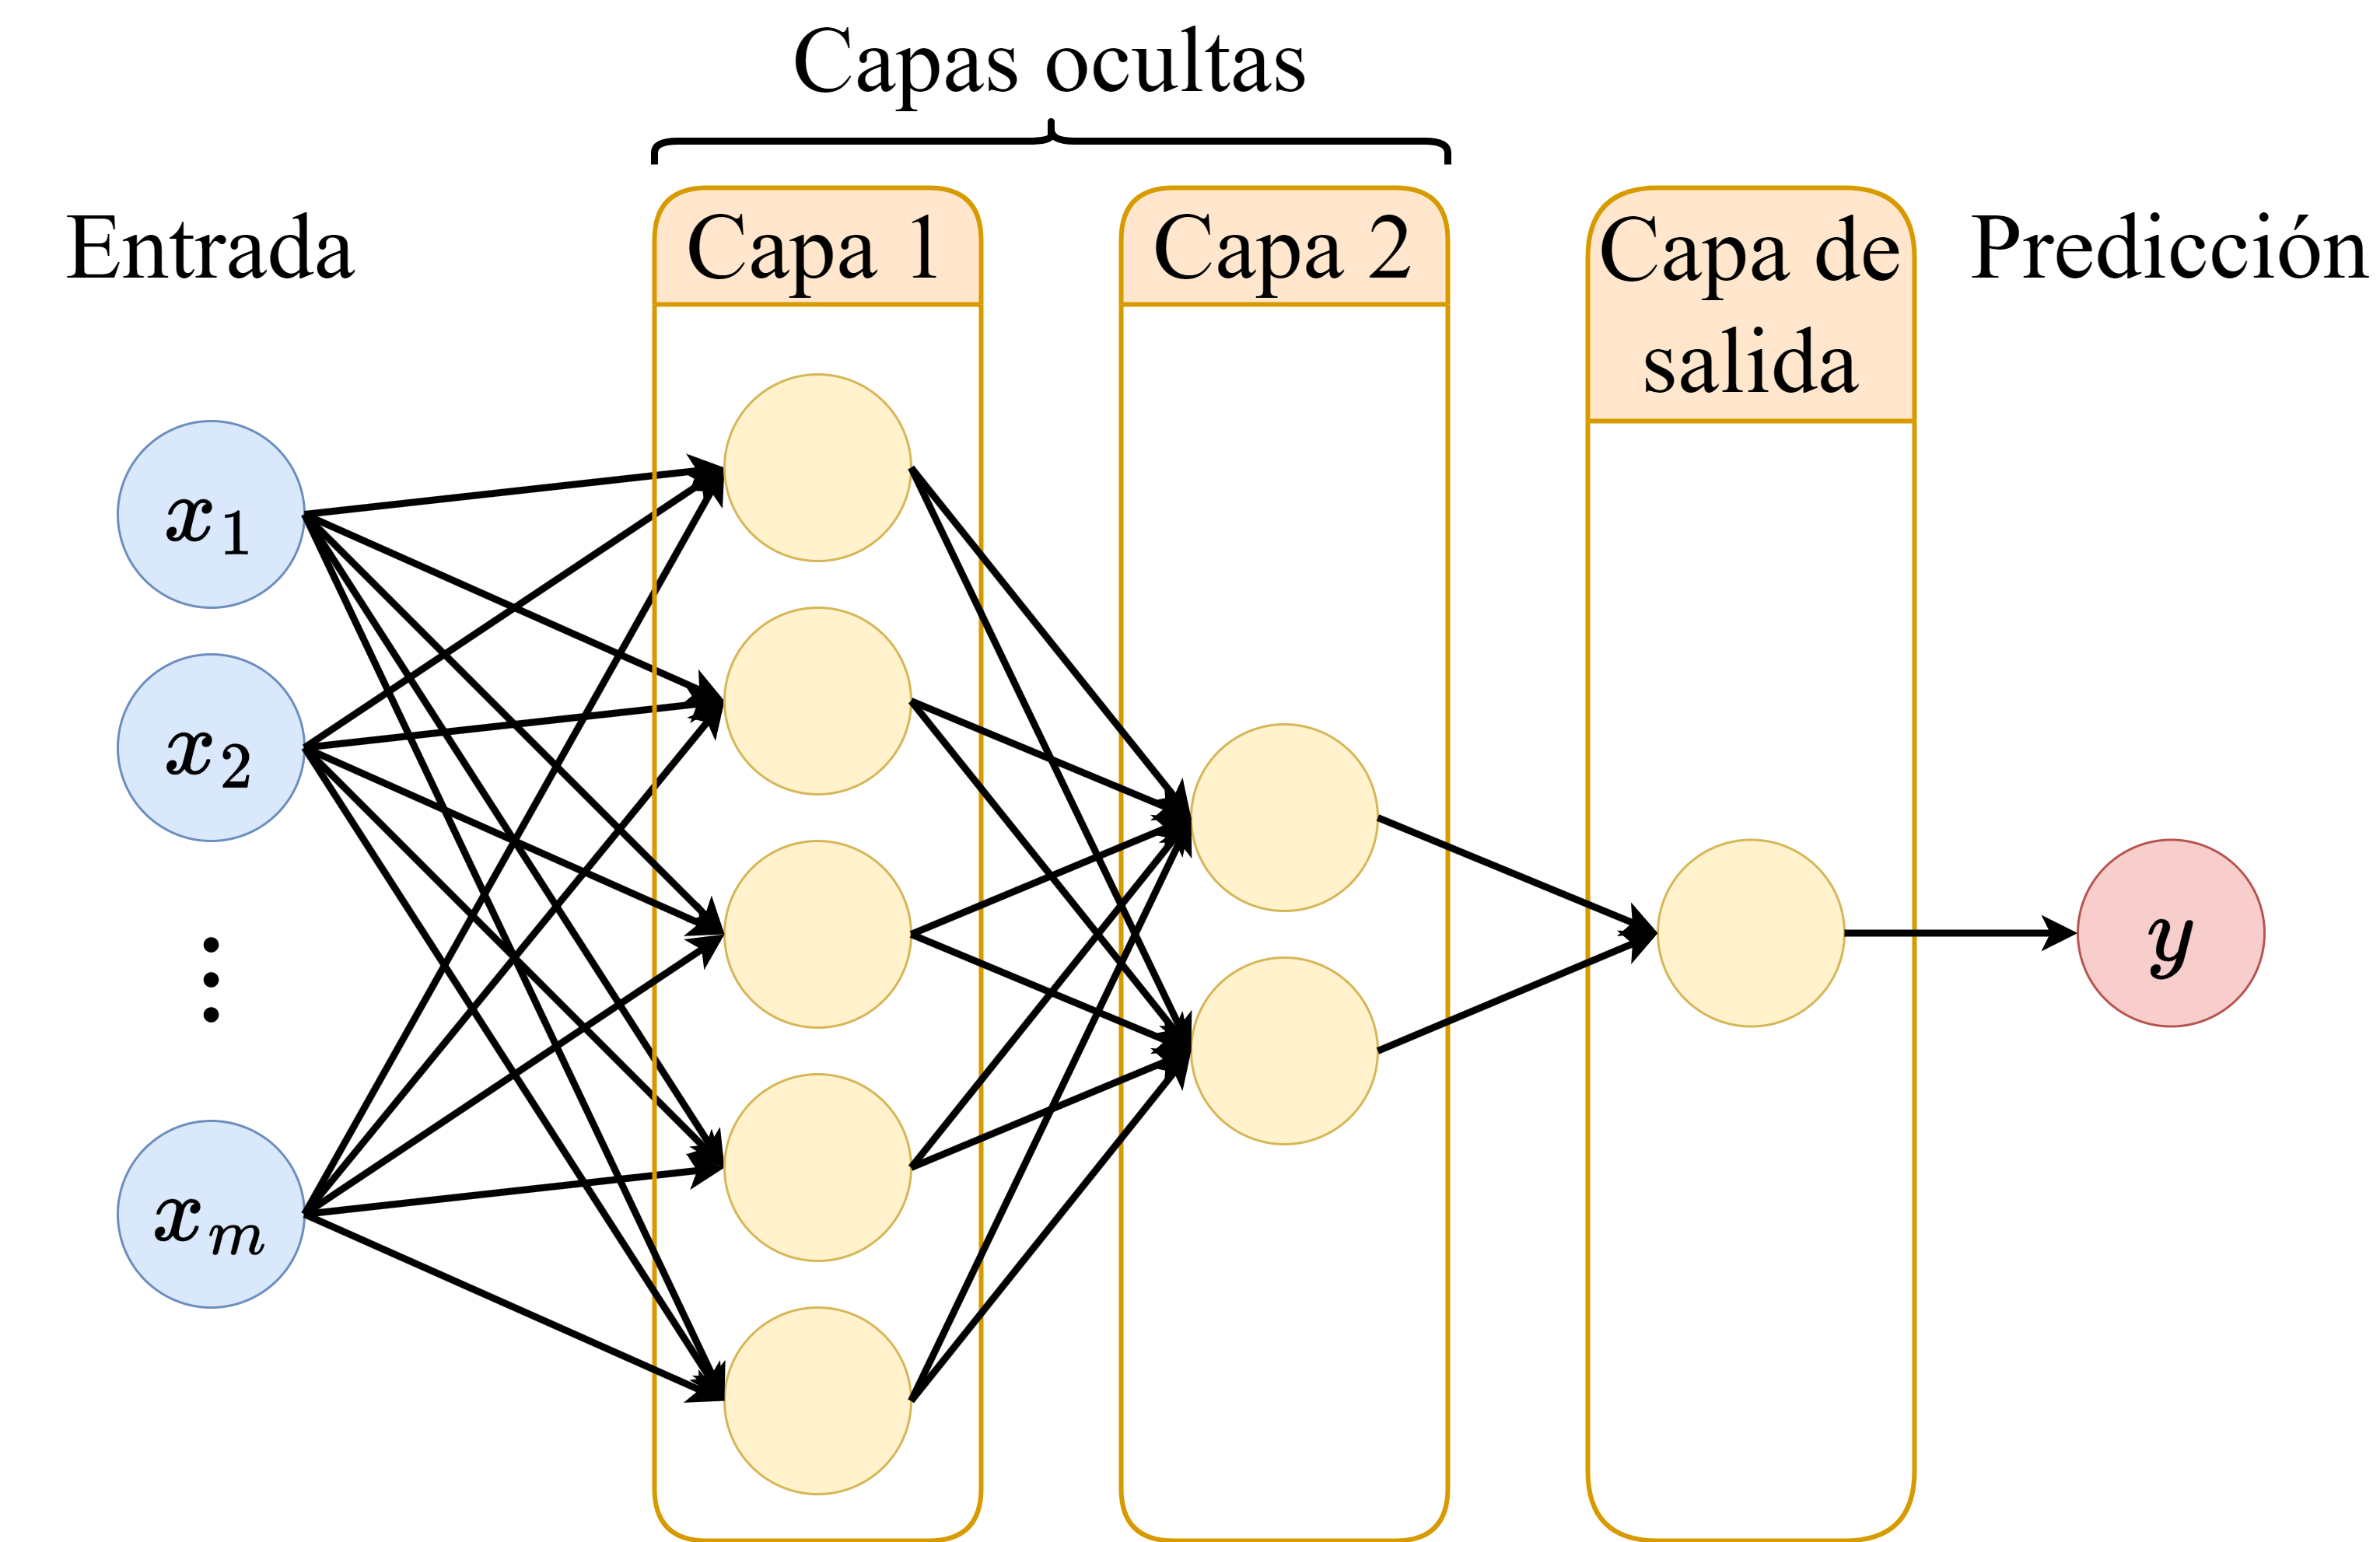
Figure 4: Red neuronal secuencial.
Luego, el modelo se compila con un optimizador (utilizaremos Gradiente Descendente Estocástico), una función de pérdida (en este caso entropía cruzada binaria, adecuada para clasificación binaria), y una métrica (accuracy en este caso).

### 3.1 Creando un perpectrón con keras

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

set_random_seeds(10)

# Crear un modelo secuencial
model = Sequential()

# Añadir una capa densa con una única neurona
model.add(Dense(1, input_dim=2, activation="sigmoid"))

# Crear optimizador
learning_rate = 0.1
optimizer = SGD(learning_rate=learning_rate)

# Compilar el modelo
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Una vez creado el modelo podemos ver un resumen de la arquitectura de la red:

In [15]:
# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Y ahora podemos entrenarlo como hacíamos con los modelos de sklearn:

In [16]:
# Cargar el conjunto de datos
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos02b_train.csv")

# Separar las variables (X) de las etiquetas (y)
X_train = df[["Peso", "Estatura"]]
y_train = df["ActividadFisica"]

# Estandarizar los datos
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=["Peso", "Estatura"])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=10)

Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7244 - loss: 0.5321
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8396 - loss: 0.3865
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8411 - loss: 0.3819
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8402 - loss: 0.3810
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8413 - loss: 0.3806


Y también podemos hacer las predicciones como hacíamos antes:

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


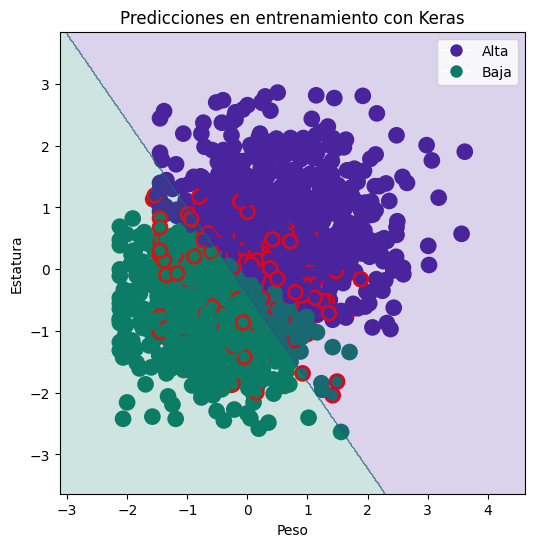


El accuracy en entrenamiento es: 0.84


In [17]:
# Predecir las etiquetas de los datos de entrenamiento
y_pred = model.predict(X_train).flatten()

# Convertir las predicciones a etiquetas
y_pred = (y_pred > 0.5).astype(int)

# Visualizar las predicciones
visualizar_predicciones_perceptron(
    X_train,
    y_train,
    y_pred,
    "Predicciones en entrenamiento con Keras",
    "Peso",
    "Estatura",
    dict_clases,
    fig_size=(6, 6),
)

# Medir accuracy
accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
print(f"\nEl accuracy en entrenamiento es: {accuracy:.2f}")

### 3.2 Creando una red neuronal con keras
Hasta ahora solo teníamos una neurona, así que solo podíamos aprender una frontera de decisión lineal. Normalmente los problemas no son tan sencillos y necesitaremos poder aprender funciones más complejas. Esto se puede hacer de dos formas:

Añadiendo más neuronas a la capa oculta.
Añadiendo más capas ocultas.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

None

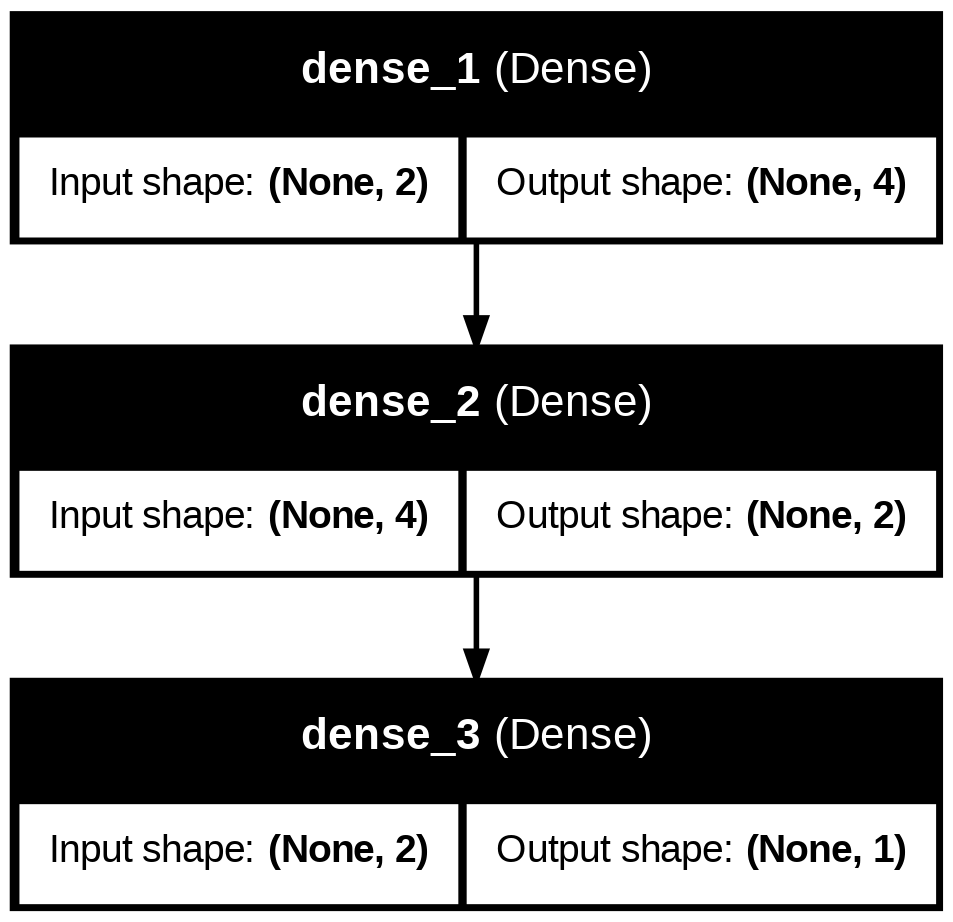

In [18]:
from keras.utils import plot_model

set_random_seeds(10)

# Crear un modelo secuencial
model = Sequential()

# Añadir capas
model.add(Dense(4, input_dim=2, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Crear optimizador
learning_rate = 0.1
optimizer = SGD(learning_rate=learning_rate)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # Compilar el modelo

display(model.summary())  # Resumen del modelo

# Visualizar el modelo
plot_model(model, show_shapes=True, show_layer_names=True)

Ver el código de visualizar_predicciones()

In [19]:
def visualizar_predicciones(X_test: pd.DataFrame, y_test: pd.DataFrame, y_pred: np.ndarray, title: str,
                                       x_label: str, y_label: str, legend_dict: dict = None,
                                       x_range: list = None, y_range: list = None, fig_size: tuple = (4,4)) -> None:

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=fig_size)

    # Generar colores para las predicciones
    colors = ["#4A249D", "#0D7C66"]  # Cambia estos colores según tus clases si es necesario

    # Visualizar los puntos de prueba y destacar errores con borde rojo
    ax.scatter(X_test[:, 0], X_test[:, 1], c=[colors[c] for c in y_pred],
               s=100,
               edgecolor=[colors[y_pred[i]] if y_pred[i] == y_test.iloc[i] else "r" for i in range(len(y_pred))],
               linewidths=2)

    # Configurar etiquetas y título
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    # Ajustar rango de los ejes si se proporciona
    if x_range is not None:
        ax.set_xlim(x_range)
    if y_range is not None:
        ax.set_ylim(y_range)

    # Añadir la leyenda si se proporciona
    if legend_dict is not None:
        legend_elements = [
            Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[0], markersize=10, label=legend_dict[0]),
            Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[1], markersize=10, label=legend_dict[1]),
        ]
        plt.legend(handles=legend_elements)

    plt.show()

Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7331 - loss: 0.5391
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8297 - loss: 0.3913
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8345 - loss: 0.3794
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8316 - loss: 0.3771
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8316 - loss: 0.3766


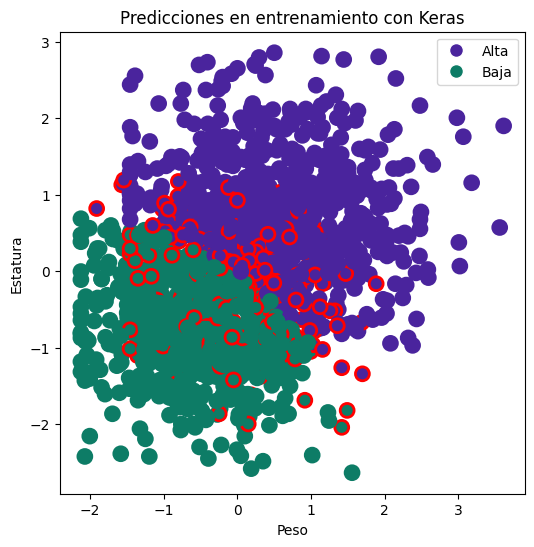


El accuracy en entrenamiento es: 0.83


In [20]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=10)

# Predecir las etiquetas de los datos de entrenamiento
y_pred = model.predict(X_train, verbose=0).flatten()

# Convertir las predicciones a etiquetas
y_pred = (y_pred > 0.5).astype(int)

# Visualizar las predicciones
visualizar_predicciones(
    X_train.to_numpy(),
    y_train,
    y_pred,
    "Predicciones en entrenamiento con Keras",
    "Peso",
    "Estatura",
    dict_clases,
    fig_size=(6, 6),
)

# Medir accuracy
accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
print(f"\nEl accuracy en entrenamiento es: {accuracy:.2f}")

Algo que nos ocurrir es que los datos tengan demasiada poca información para poder aprender una función que los clasifique biebn. Por ejemplo, con la estatura y el peso no tenemos suficiente información para decidir la actividad física de la persona. En estos casos la solución pasa por mejorar la calidad de los datos para poder tener más información: añadir más características, más ejemplos, etc. Vamos a utilizar el dataset datos04_train.csv:

Ver el código para cargar datos04_train.csv

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos04_train.csv")

# Separar las variables (X) de las etiquetas (y)
X_train = df.drop(columns=["ActividadFisica"])  # Quitar la columna de clase
y_train = df["ActividadFisica"]

X_train.info()

categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()  # Variables categóricas
numeric_features = X_train.select_dtypes(include=["number"]).columns.tolist()  # Variables numéricas

# Create a pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]),
            numeric_features,
        ),
        (
            "cat",
            Pipeline(
                steps=[
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    ("encoder", OneHotEncoder(handle_unknown="ignore")),
                ]
            ),
            categorical_features,
        ),
    ]
)

X_train = preprocessor.fit_transform(X_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Peso              1500 non-null   float64
 1   Estatura          1500 non-null   float64
 2   Edad              1500 non-null   int64  
 3   PctGrasaCorporal  1500 non-null   float64
 4   EstadoCivil       1500 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 58.7+ KB


Ahora con un Perceptrón, como tenemos más características, vamos a clasificar mejor:

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7587 - loss: 0.4906
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9300 - loss: 0.2418
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1749
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.1369
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.1122


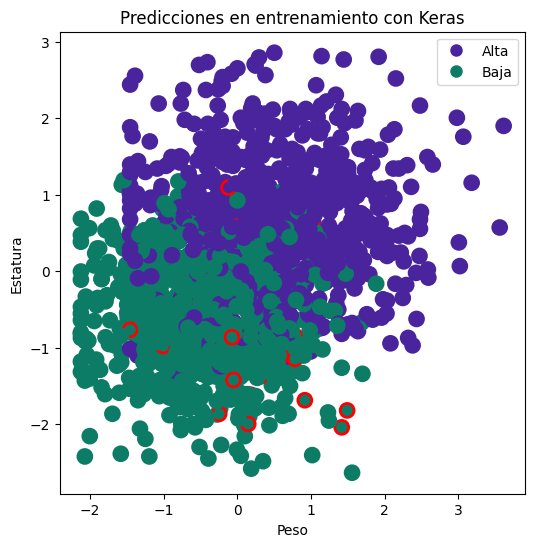


El accuracy en entrenamiento es: 0.99


In [22]:
set_random_seeds(10)

# Crear un modelo secuencial
model = Sequential()

# Añadir capas
model.add(Dense(1, input_dim=7, activation="sigmoid"))

# Crear optimizador
learning_rate = 0.1
optimizer = SGD(learning_rate=learning_rate)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"]) # Compilar el modelo

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=10)

# Predecir las etiquetas de los datos de entrenamiento
y_pred = model.predict(X_train, verbose=0).flatten()

# Convertir las predicciones a etiquetas
y_pred = (y_pred > 0.5).astype(int)

# Visualizar las predicciones
visualizar_predicciones(
    X_train,
    y_train,
    y_pred,
    "Predicciones en entrenamiento con Keras",
    "Peso",
    "Estatura",
    dict_clases,
    fig_size=(6, 6),
)

# Medir accuracy
accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
print(f"\nEl accuracy en entrenamiento es: {accuracy:.2f}")

Pero si añadimos más capas y neuronas, podemos mejorar la función que aprendemos:

Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7914 - loss: 0.5206
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.1072
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0487
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0311
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0227


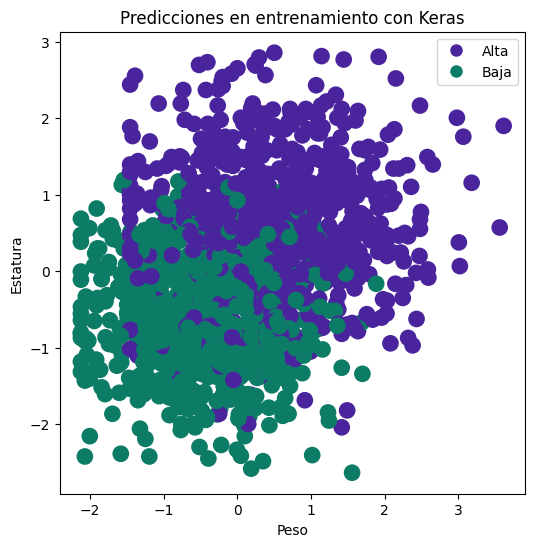


El accuracy en entrenamiento es: 1.00


In [23]:
def create_simple_nn(input_dims):
    set_random_seeds(10)

    # Crear un modelo secuencial
    model = Sequential()

    # Añadir capas
    model.add(Dense(4, input_dim=input_dims, activation="relu"))
    model.add(Dense(2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    return model


model = create_simple_nn(input_dims=7)

# Crear optimizador
learning_rate = 0.1
optimizer = SGD(learning_rate=learning_rate)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # Compilar el modelo

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=10)

# Predecir las etiquetas de los datos de entrenamiento
y_pred = model.predict(X_train, verbose=0).flatten()

# Convertir las predicciones a etiquetas
y_pred = (y_pred > 0.5).astype(int)

# Visualizar las predicciones
visualizar_predicciones(
    X_train,
    y_train,
    y_pred,
    "Predicciones en entrenamiento con Keras",
    "Peso",
    "Estatura",
    dict_clases,
    fig_size=(6, 6),
)

# Medir accuracy
accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
print(f"\nEl accuracy en entrenamiento es: {accuracy:.2f}")

### 3.3 Learning rate
El learning rate (tasa de aprendizaje) es un hiperparámetro que controla cuánto se ajustan los pesos de la red en cada paso de entrenamiento. Cuánto más alto sea el learning rate, mayor es cada actualización de los pesos.
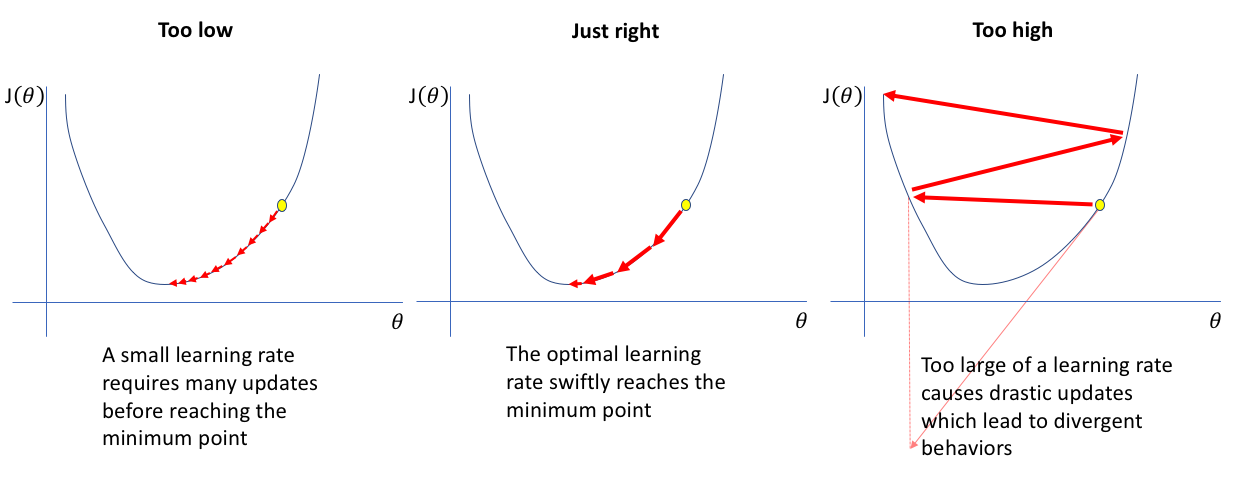
Figure 5: Efectos del learning rate. Imagen extraída de https://www.jeremyjordan.me/nn-learning-rate/.
Veamos lo que pasa con un ejemplo sencillo, utilizando dos instancias del dataset:

Ver el código de visualizar_predicciones()

In [24]:
from IPython.display import HTML

# Calcular las predicciones
def show_pred(i: int, W: np.array = W, b: float = b):
    pred_i = compute_neuron_perceptron(X_train[i], W, b)

    # Crear una sola cadena HTML que combine todo el contenido
    html_content = f"""
    <div>
        <strong>X_train[{i}]:</strong><br>
        <span>&emsp;Predicción: {dict_clases[pred_i]}</span>
        <span style='color:{colors[pred_i]};'>■</span><br>
        <span>&emsp;Real:&emsp;&emsp;&emsp;{dict_clases[y_train[i]]}</span>
        <span style='color:{colors[y_train[i]]};'>■</span>
    </div>
    """

    # Mostrar todo el contenido en una sola llamada display
    display(HTML(html_content))

In [25]:
np.random.seed(0)

W_ini = np.random.uniform(-1, 1, 7)
b_ini = 1
learning_rate = 10

print(f"Pesos iniciales: {np.round(W_ini, decimals=3)}")
print(f"Sesgo inicial:   {b_ini:.3f}")
print(f"Learning rate:   {learning_rate}")

show_pred(0, W_ini, b_ini)
show_pred(4, W_ini, b_ini)
print()

Pesos iniciales: [ 0.098  0.43   0.206  0.09  -0.153  0.292 -0.125]
Sesgo inicial:   1.000
Learning rate:   10


La primera instancia está mal clasificada pero la segunda que probamos está bien clasificada. Vamos a actualizar los pesos y el sesgo para corregir el error:

In [26]:
# Actualizar los pesos y el sesgo con la primera instancia
W, b = update_weights(W_ini, b_ini, [X_train[0]], y_train[0], compute_neuron_perceptron(X_train[0], W_ini, b_ini), learning_rate, verbose=False)

print(f"Pesos actuales: {np.round(W, decimals=3)}")
print(f"Sesgo actual:   {b:.3f}")

show_pred(0, W, b)
show_pred(4, W, b)
print()

Pesos actuales: [ -5.47   -2.636 -16.68   -4.541 -10.153   0.292  -0.125]
Sesgo actual:   -9.000


Hemos corregido el error pero ahora la segunda instancia está mal clasificada! Esto es porque el learning rate es demasiado alto y estamos dando pasos demasiado grandes en la dirección del gradiente. Vamos a probar con un learning rate más bajo:

In [27]:
learning_rate = 0.1

# Actualizar los pesos y el sesgo con la primera instancia
W, b = update_weights(W_ini, b_ini, [X_train[0]], y_train[0], compute_neuron_perceptron(X_train[0], W_ini, b_ini), learning_rate, verbose=False)

print(f"Nuevo learning rate:   {learning_rate}")
print(f"Pesos actuales: {np.round(W, decimals=3)}")
print(f"Sesgo actual:   {b:.3f}")

show_pred(0, W, b)
show_pred(4, W, b)
print()

Nuevo learning rate:   0.1
Pesos actuales: [ 0.042  0.4    0.037  0.043 -0.253  0.292 -0.125]
Sesgo actual:   0.900


Seguimos sin corregir el error en la primera instancia, pero la segunda sigue bien. Si repetimos las actualizaciones, al final tendremos:

In [28]:
for i in range(10):
  # Actualizar los pesos y el sesgo con la primera instancia
  W, b = update_weights(W, b, [X_train[0]], y_train[0], compute_neuron_perceptron(X_train[0], W, b), learning_rate, verbose=False)

# Resultado final
show_pred(0, W, b)
show_pred(4, W, b)
print()

Un learning rate alto puede hacer que el modelo no converja, mientras que un learning rate bajo puede hacer que el entrenamiento sea muy lento.

### 3.4 Función de activación
La función de activación de una neurona es una función matemática que se aplica tras el sumatorio, antes de la salida final de la neurona. La función de activación introduce no linealidades en la red, permitiendo a la red aprender funciones más complejas. En el perceptrón, la función de activación es la función escalón, que devuelve 1 si la entrada es mayor que 0, y 0 en otro caso.

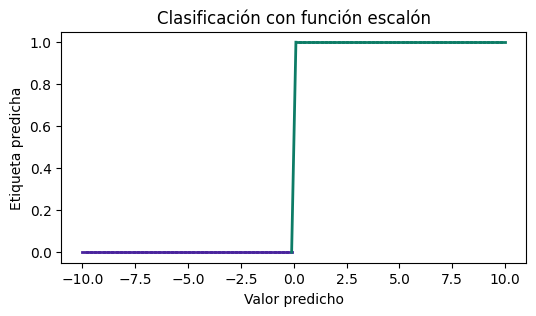

In [29]:
import matplotlib.colors as mcolors

def escalon(x):
  return x > 0

def color_scale(y):
  return np.expand_dims(1 - y, 1) * np.array(mcolors.to_rgba('#4A249D', alpha=1)) + np.expand_dims(y, 1) * np.array(mcolors.to_rgba('#0D7C66', alpha=1))

def plot_colors(x, y, colors):
  plt.figure(figsize=(6,3))
  for i in range(1, len(x)):
    plt.plot(x[i-1:i+1], y[i-1:i+1], color=colors[i], lw=2)
  plt.xlabel("Valor predicho")
  plt.ylabel("Etiqueta predicha")

x = np.linspace(-10, 10, 100)
y = escalon(x)

plot_colors(x, y, color_scale(y))
plt.title("Clasificación con función escalón")

plt.show()

En las redes neuronales modernas, se utilizan funciones de activación más complejas, como la función sigmoide, la función ReLU, o la función tangente hiperbólica. En nuestro caso, hemos utilizado la función sigmoide, que devuelve un valor entre 0 y 1: \text{sigmoid}(x) = \frac{1}{1 + e^{-x}}

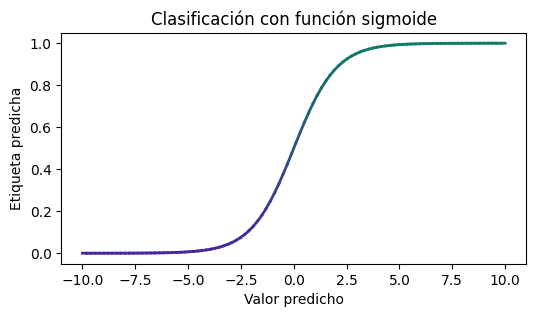

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plot_colors(x, y, color_scale(y))
plt.title("Clasificación con función sigmoide")
plt.show()

La sigmoide resulta en valores entre 0 y 1, que en clasificación nos es útil para tener una probabilidad de pertenencia a cada clase.

La ReLu es otra función de activación muy utilizada en redes neuronales, pero no se puede utilizar como la probabilidad de pertenencia a una clase porque su rango no es [0,1]

:
\text{ReLU}(x) = \max(0, x)

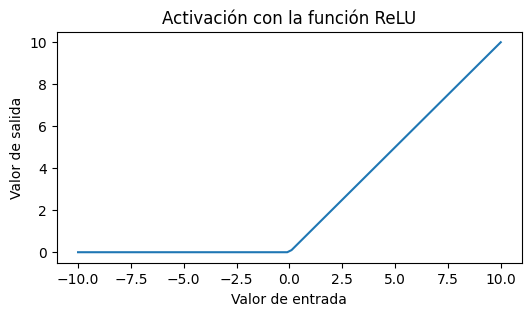

In [31]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)

plt.figure(figsize=(6,3))
plt.plot(x, y)
plt.title("Activación con la función ReLU")
plt.xlabel("Valor de entrada")
plt.ylabel("Valor de salida")
plt.show()

Las funciones de activación se pueden incorporar directamente a las capas que utilicen activación mediante el parámetro activation:

In [32]:
Sequential([Dense(4, input_dim=7, activation="relu")]).summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 4)                   │              32 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

O también se pueden añadir como capas separadas, por ejemplo la activación ReLU:

In [33]:
from keras.layers import ReLU

Sequential([Dense(4, input_dim=7, activation=None), ReLU()]).summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

### 3.5 Función de pérdida
La función de pérdida es una medida de cuánto se equivoca el modelo en sus predicciones. Los pesos del modelo se modifican según el valor de la pérdida, para intentar minimizarla: es decir, los ajustes de los pesos intentan disminuir los errores del modelo. En el perceptrón, la función de pérdida es el error absoluto medio (mean absolute error, MAE):
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \text{abs}(y_{\text{real}} - y_{\text{predicha}})
Y esta función era la que utilizábamos para actualizar los pesos. Podemos ver la MAE de nuestro perceptrón anterior:

In [34]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_train, y_pred)
print(f"El error absoluto medio del modelo es: {mae:.2f}")

El error absoluto medio del modelo es: 0.00


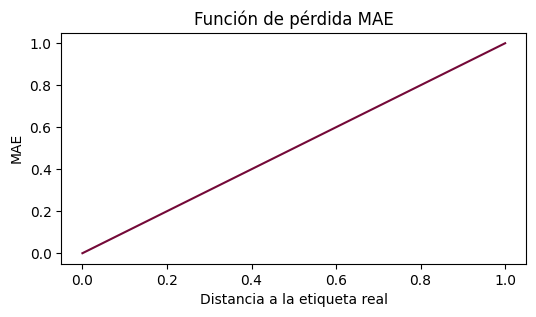

In [35]:
x = np.linspace(0, 1, 100)
y = [mean_absolute_error([i], [0]) for i in x]

plt.figure(figsize=(6,3))
plt.plot(x, y, color="#740938")
plt.title("Función de pérdida MAE")
plt.xlabel("Distancia a la etiqueta real")
plt.ylabel("MAE")
plt.show()

NOTA:
Diferencia entre función de pérdida y métrica
La función de pérdida es la función que el modelo intenta **minimizar** durante el entrenamiento. Los pesos del modelo se van ajustando para disminuir el valor de la función de pérdida.

La métrica es una medida adicional que se utiliza para **evaluar** el rendimiento del modelo, pero no se utiliza para ajustar los pesos del modelo.

NOTA:
Binary Crossentropy
En clasificación binaria, una función de pérdida común es la entropía cruzada binaria (binary crossentropy). Al igual que MAE, mide el error que estamos cometiendo, pero su fórmula matemática es diferente y da más peso a errores más grandes:

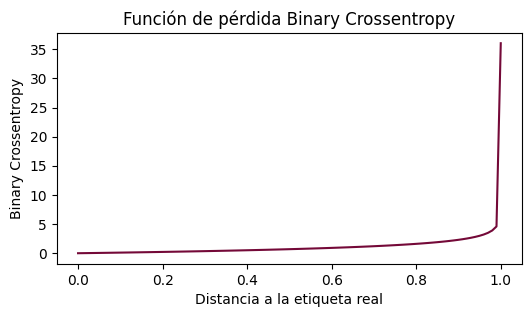

In [36]:
# Ver con binary crossentropy
from sklearn.metrics import log_loss

x = np.linspace(0, 1, 100)
y = [log_loss([0], [i], labels=[0,1]) for i in x]

plt.figure(figsize=(6,3))
plt.plot(x, y, color="#740938")
plt.title("Función de pérdida Binary Crossentropy")
plt.xlabel("Distancia a la etiqueta real")
plt.ylabel("Binary Crossentropy")
plt.show()

### 3.6 Batches
Un batch es el subconjunto de ejemplos que se utilizan para actualizar los pesos. En el ejemplo que vimos en la sección de learning rate, utilizábamos un tamaño de batch de 1
 porque hacíamos una actualización con cada instancia. En la práctica, se utilizan tamaños de batch mayores para acelerar el entrenamiento. Vamos a ver cómo se actualizan los pesos con un batch de 5
 instancias:

In [37]:
np.random.seed(0)
W_ini = np.random.uniform(-1, 1, 7)
b_ini = 1
learning_rate = 1
batch_size = 5

print(f"Pesos iniciales: {np.round(W_ini, decimals=3)}")
print(f"Sesgo inicial:   {b_ini:.3f}")
print(f"Learning rate:   {learning_rate}")
print(f"Batch size: {batch_size}")

show_pred(0, W_ini, b_ini)
show_pred(4, W_ini, b_ini)

for i in range(10):
  # Actualizar los pesos y el sesgo con la primera instancia
  W, b = update_weights(W_ini, b_ini, X_train[0:batch_size], y_train[0:batch_size], compute_neuron_perceptron(X_train[0:batch_size], W_ini, b_ini), learning_rate, verbose=False)

print(f"Pesos actuales: {np.round(W, decimals=3)}")
print(f"Sesgo actual:   {b:.3f}")

show_pred(0, W, b)
show_pred(4, W, b)
print()

Pesos iniciales: [ 0.098  0.43   0.206  0.09  -0.153  0.292 -0.125]
Sesgo inicial:   1.000
Learning rate:   1
Batch size: 5


Pesos actuales: [-0.082  0.408  0.196 -0.053 -0.313  0.292 -0.365]
Sesgo actual:   0.600


No conseguimos una solución óptima. No obstante, las redes neuronales tardan tiempo en entrenarse y aumentar el tamaño del batch permite acelerar el entrenamiento:

In [38]:
import time

learning_rate = 0.1

# Crear el modelo y compilarlo
model = create_simple_nn(input_dims=7)
optimizer = SGD(learning_rate=learning_rate)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Medir tiempo de entrenamiento con batch de 1
start_time = time.time()
history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0)
time_batch_1 = round(time.time() - start_time, 2)

accuracy_1 = model.evaluate(X_train, y_train, verbose=0)[1]


# Volver a crear y compilar el modelo
model = create_simple_nn(input_dims=7)
optimizer = SGD(learning_rate=learning_rate)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Medir tiempo de entrenamiento con batch de 32
start_time = time.time()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
time_batch_32 = round(time.time() - start_time, 2)

accuracy_32 = model.evaluate(X_train, y_train, verbose=0)[1]

df = pd.DataFrame({"Tiempo (s)": [time_batch_1, time_batch_32], "Accuracy": [accuracy_1, accuracy_32]}, index=[1, 32])
df.index.name = "Batch size"
df

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,Tiempo (s),Accuracy
Batch size,,
1,34.37,1.0
32,4.12,1.0


### 3.7 Épocas

Una época es una pasada completa por todo el conjunto de datos de entrenamiento. En cada época, el modelo ajusta los pesos de las neuronas para minimizar la función de pérdida utilizando todos los ejemplos de entrenamiento. Hay varios aspectos a tener en cuenta:

Cuántas más épocas, en general, mayor aprendizaje realiza la red.
Cuántas más épocas, más tiempo tardamos en entrenar el modelo.
Cuántas más épocas, más riesgo de sobreajuste.
Hay veces que la red no puede aprender más y seguir añadiendo épocas no aporta nada.
Vamos a cargar ahora a utilizar el dataset MathLearningDataset.csv.

Ver el código para cargar load_MathLearningDataset()

In [40]:
from sklearn.model_selection import train_test_split


def load_MathLearningDataset(test_size: float = 0.25):
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/MathLearningDataset.csv")

    X_orig = df.drop(columns=["Type of Answer"])
    y_orig = df["Type of Answer"]

    X_train, X_test, y_train, y_test = train_test_split(
        X_orig, y_orig, test_size=test_size, random_state=348, stratify=y_orig
    )

    categorical_features = X_orig.select_dtypes(include=["object"]).columns.tolist()  # Variables categóricas
    numeric_features = [col for col in X_orig.select_dtypes(include=["number"]).columns.tolist() if "ID" not in col]

    # Create a pipeline de preprocesamiento
    preprocessor = ColumnTransformer(
        transformers=[
            (
                "num",
                Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]),
                numeric_features,
            ),
            (
                "cat",
                Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OneHotEncoder())]),
                categorical_features,
            ),
        ]
    )

    # Preprocesar los datos
    X_train = preprocessor.fit_transform(X_train).toarray()  # Entrenar y transformar
    X_test = preprocessor.transform(X_test).toarray()  # Solo transformar porque es test

    return X_train, X_test, y_train, y_test

Vamos a probar el modelo que teníamos anteriormente:

In [41]:
set_random_seeds(10)

X_train, X_test, y_train, y_test = load_MathLearningDataset()

# Crear un modelo secuencial
model = create_simple_nn(input_dims=X_train.shape[1])

# Crear optimizador
learning_rate = 0.1
optimizer = SGD(learning_rate=learning_rate)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"]) # Compilar el modelo

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=16)

# Medir accuracy
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\nEl accuracy en test es: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5334 - loss: 0.6908
Epoch 2/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5484 - loss: 0.6853
Epoch 3/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5572 - loss: 0.6818
Epoch 4/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5695 - loss: 0.6790
Epoch 5/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5763 - loss: 0.6769
Epoch 6/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5823 - loss: 0.6755
Epoch 7/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5844 - loss: 0.6745
Epoch 8/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5835 - loss: 0.6733
Epoch 9/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5871 - loss: 0.6726
Epoch 10/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5849 - loss: 0.6721
Epoch 11/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5877 - loss: 0.6717
Epoch 12/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Ahora que el dataset es más complejo, la red no es capaz de aprender bien. Vamos a utilizar una red más compleja:

In [42]:
def create_MathLearning_model():
    set_random_seeds(10)

    model = Sequential(
        [
            Dense(256, activation="relu", input_shape=(50,)),
            Dense(128, activation="relu"),
            Dense(64, activation="relu"),
            Dense(32, activation="relu"),
            Dense(1, activation="sigmoid"),
        ]
    )

    return model


model = create_MathLearning_model()

learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # Compilar el modelo

history = model.fit(X_train, y_train, epochs=5, batch_size=16)  # Entrenar el modelo

# Medir accuracy
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\nEl accuracy en test es: {accuracy:.2f}")

Epoch 1/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5316 - loss: 0.6918
Epoch 2/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5405 - loss: 0.6877
Epoch 3/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5506 - loss: 0.6849
Epoch 4/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5777 - loss: 0.6822
Epoch 5/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5817 - loss: 0.6796

El accuracy en test es: 0.56


Si nos fijamos, en las 5 épocas el modelo seguía aprendiendo. Nos interesa que mientras pueda seguir aprendiendo, lo haga, por lo que podemos entrenarlo durante más épocas:

In [43]:
model = create_MathLearning_model()

optimizer = SGD(learning_rate=learning_rate)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # Compilar el modelo

history = model.fit(X_train, y_train, epochs=30, batch_size=16)  # Entrenar el modelo

# Medir accuracy
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\nEl accuracy en test es: {accuracy:.2f}")

Epoch 1/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5316 - loss: 0.6918
Epoch 2/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5405 - loss: 0.6877
Epoch 3/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5506 - loss: 0.6849
Epoch 4/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5777 - loss: 0.6822
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5817 - loss: 0.6796
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5831 - loss: 0.6770
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5881 - loss: 0.6745
Epoch 8/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5911 - loss: 0.6718
Epoch 9/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5965 - loss: 0.6694
Epoch 10/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6016 - loss: 0.6671
Epoch 11/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6024 - loss: 0.6650
Epoch 12/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Lo que puede pasar es que tras un determinado número de épocas, el modelo deje de aprender. Esto lo podemos ver a través de la evolución de la pérdida y la métrica de evaluación durante el entrenamiento.

### 3.8 Historia de entrenamiento
El método fit devuelve un objeto history que contiene información sobre el entrenamiento del modelo. Podemos utilizar este objeto para visualizar cómo cambia la pérdida y la precisión del modelo durante el entrenamiento:

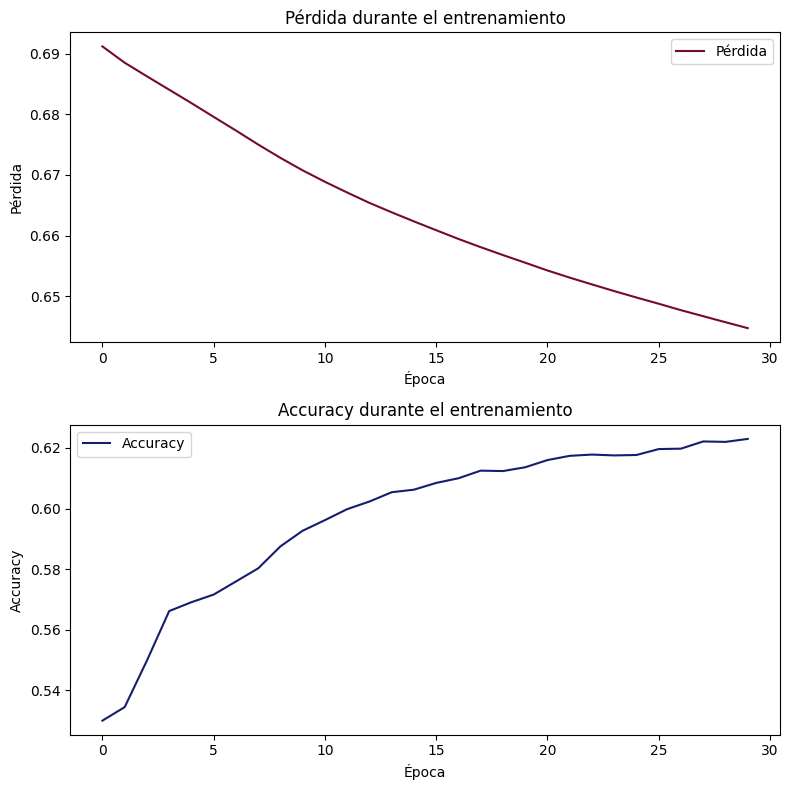

In [44]:
# Visualizar la pérdida y la precisión durante el entrenamiento
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history["loss"], label="Pérdida", color="#740938")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Pérdida durante el entrenamiento")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history["accuracy"], label="Accuracy", color="#161D6F")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy durante el entrenamiento")
plt.legend()

plt.tight_layout()
plt.show()

Lo que nos interesaría es poder ver también la evolución de test, ¿no? Esto se puede lograr utilizando un conjunto de validación (ver Figure 6):
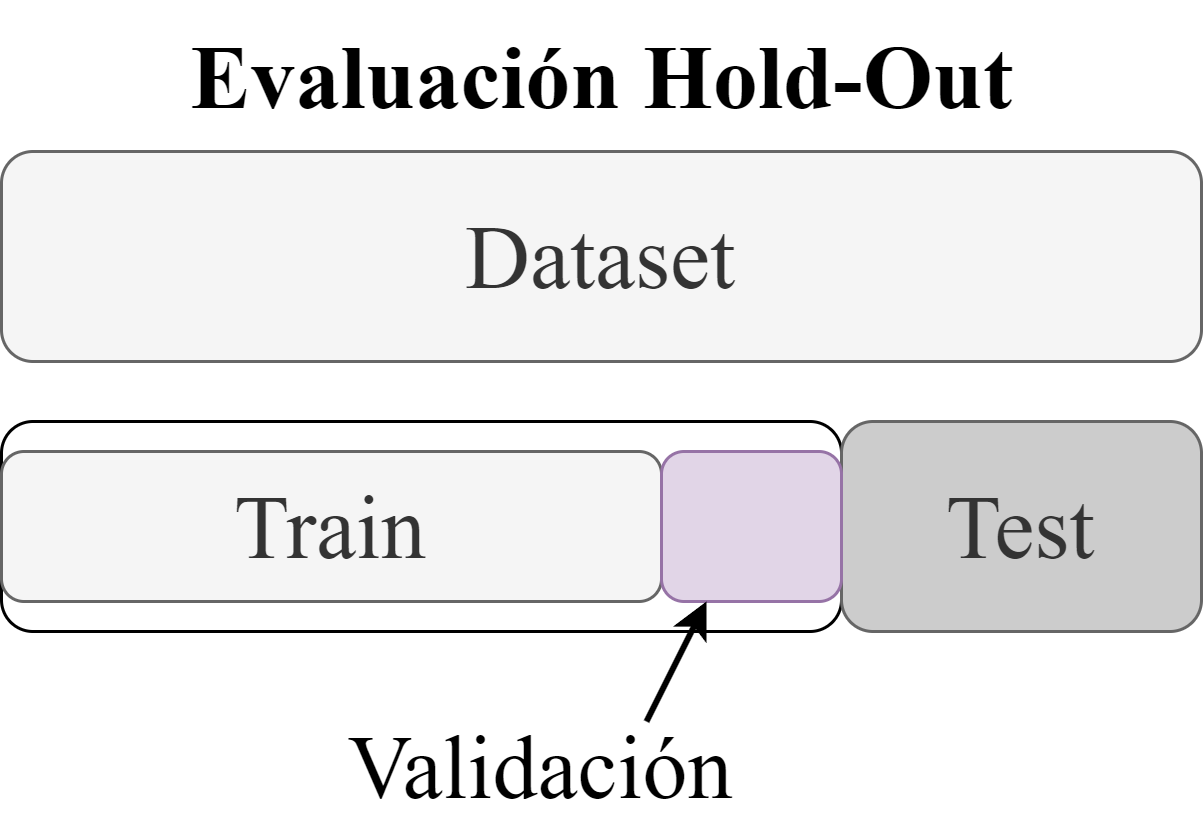
Figure 6: División en entrenamiento + validación y test
Vamos a separar un conjunto de validación del **conjunto de entrenamiento:**

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=348, stratify=y_train)

Ojo que ahora realmente no estamos entrenando con el
75% de los datos, sino con el 75%
 del 75%
 los datos. Veamos qué ocurre durante el entrenamiento:

 Ver el código de plot_history()

In [46]:
from matplotlib.ticker import MaxNLocator

def plot_history(history: dict) -> None:
    plt.figure(figsize=(8, 8))

    plt.subplot(2, 1, 1)
    plt.plot(history.history["loss"], label="Entrenamiento", color="#CD1818")
    plt.plot(history.history["val_loss"], label="Validación", color="#006769")
    plt.xlabel("Época")
    plt.ylabel("Pérdida")
    plt.title("Pérdida durante el entrenamiento")
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(2, 1, 2)
    plt.plot(history.history["accuracy"], label="Entrenamiento", color="#CD1818")
    plt.plot(history.history["val_accuracy"], label="Validación", color="#006769")
    plt.xlabel("Época")
    plt.ylabel("Accuracy")
    plt.title("Accuracy durante el entrenamiento")
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

Número de ejemplos en entrenamiento: 5369 (del total de 9546)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


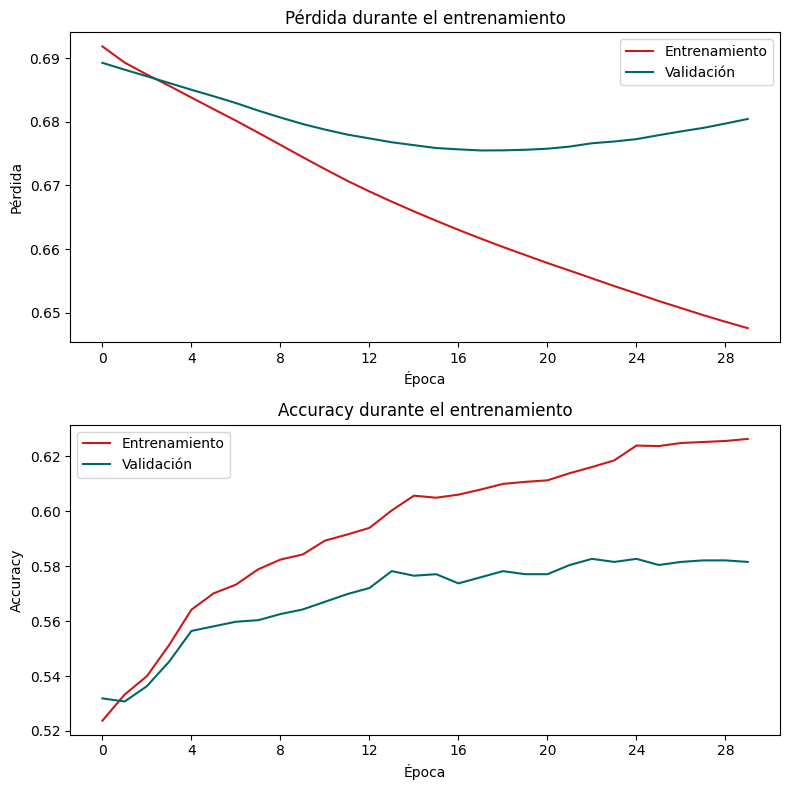

In [47]:
print(f"Número de ejemplos en entrenamiento: {len(X_train)} (del total de {len(X_train) + len(X_val) + len(X_test)})")

model = create_MathLearning_model()

optimizer = SGD(learning_rate=learning_rate)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # Compilar el modelo

# Entrenar el modelo ahora con conjunto de validación
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), verbose=0)

plot_history(history)

### 3.9 Optimizador
El optimizar es el algoritmo que se utiliza para ajustar los pesos de la red. Hasta ahora hemos utilizado el Gradiente Descendente Estocástico (SGD), pero hay muchos otros optimizadores que podemos utilizar. Vamos a comparar cómo se comporta el modelo con distintos optimizadores:

In [48]:
from keras.optimizers import Adam, RMSprop

# Entrenar el modelo con distintos optimizadores y comparar
optimizers = {
    "SGD": SGD(learning_rate=0.1),
    "Adam": Adam(learning_rate=0.0001),
    "RMSprop": RMSprop(learning_rate=0.0001),
}


histories = {}
for name, optimizer in optimizers.items():
    model = create_MathLearning_model()

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0, batch_size=16)

    histories[name] = history
    print(f"{name} accuracy en test: {model.evaluate(X_test, y_test, verbose=0)[1]:.3f}")

SGD accuracy en test: 0.583
Adam accuracy en test: 0.593
RMSprop accuracy en test: 0.595


Veamos cómo evolucionó el entrenamiento de los tres optimizadores:

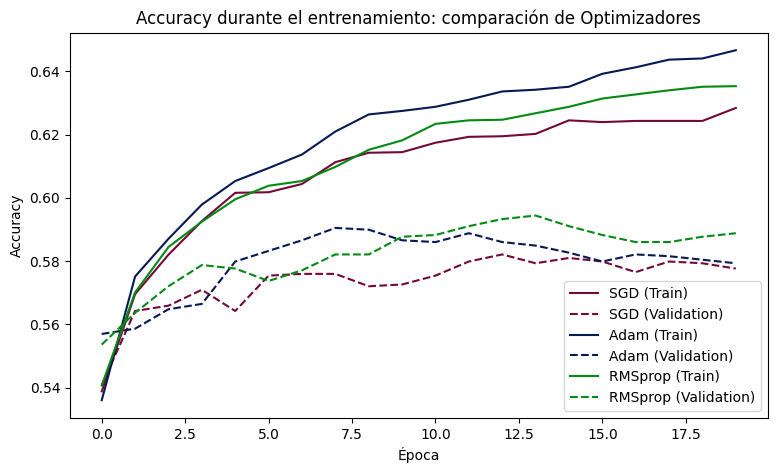

In [49]:
optimizers_colors = {"SGD": "#740938", "Adam": "#071952", "RMSprop": "#018a14"}

# Graficar la pérdida y precisión de cada optimizador
plt.figure(figsize=(9, 5))
for opt_name, history in histories.items():
    plt.plot(history.history["accuracy"], label=f"{opt_name} (Train)", color=optimizers_colors[opt_name])
    plt.plot(
        history.history["val_accuracy"],
        linestyle="--",
        label=f"{opt_name} (Validation)",
        color=optimizers_colors[opt_name],
    )
plt.title("Accuracy durante el entrenamiento: comparación de Optimizadores")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

No vamos a entrar en detalles: cada optimizador tiene ciertas ventajas y desventajas y escoger el mejor usualmente puede depender del problema. Como regla general, Adam es fácil de utilizar y SGD permite conseguir buenos resultados después de ajustar sus hiperparámetros. Si alguien quiere profundizar más en estos tres optimizadores, este es un buen material: Intuitive Explanation of SGD, Adam, and RMSProp.
### 3.10 Guardar y cargar modelos en disco

Como el entrenamiento de las redes neuronales puede llevar bastante tiempo, algo habitual es guardar el modelo en disco una vez ha sido entrenado. Más tarde podemos volver a cargarlo y utilizarlo. Keras permite guardar y cargar modelos en disco con el método save y load_model:

In [50]:
from keras.models import load_model

# Guardar el modelo
model.save("/keras_models/nn_model.h5")

# Cargar el modelo
model = load_model("/keras_models/nn_model.h5")

## 4 Ejercicio
**EJERCICIO: red neuronal para breast_cancer (20 minutos)**

Vais a utilizar el dataset breast_cancer de sklearn para entrenar una red neuronal con Keras. El objetivo es predecir si un tumor es benigno o maligno.

Tenéis que crear un modelo de red neuronal con keras, entrenarlo con los datos de entrenamiento y evaluarlo con los datos de test. Recordad emplear las técnicas que hemos visto.
Ver el código de plot_confusion_matrix()

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


def plot_confusion_matrix(y_test_orig, y_pred, target_names=None):
    if target_names is None:
        target_names = "auto"

    cm = confusion_matrix(y_test_orig, y_pred)
    cm_norm = cm / cm.sum(axis=0)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, fmt="d", annot=True, cmap="Reds", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Etiquetas predichas")
    plt.ylabel("Etiquetas real")
    plt.title("Matriz de confusión")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_norm, fmt=".2f", annot=True, cmap="Reds", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Etiquetas predichas")
    plt.ylabel("Etiquetas real")
    plt.title("Matriz de confusión normalizada por cada clase")

    plt.show()

**Importar las bibliotecas necesarias:**


In [52]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar el dataset breast_cancer:**


In [53]:
data = load_breast_cancer()

**Crear un DataFrame con los datos:**


In [54]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

**Dividir los datos en conjuntos de entrenamiento y prueba:**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], test_size=0.2, random_state=42)

**Escalar los datos:**

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Crear el modelo de red neuronal:**

In [57]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilar el modelo:**


In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Entrenar el modelo:**

In [59]:
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

**Evaluar el modelo:**

In [60]:
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Precisión del modelo: {}'.format(accuracy))

Precisión del modelo: 0.9824561476707458


**Obtener la matriz de confusión:**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Matriz de confusión, sin normalización
[[41  2]
 [ 0 71]]


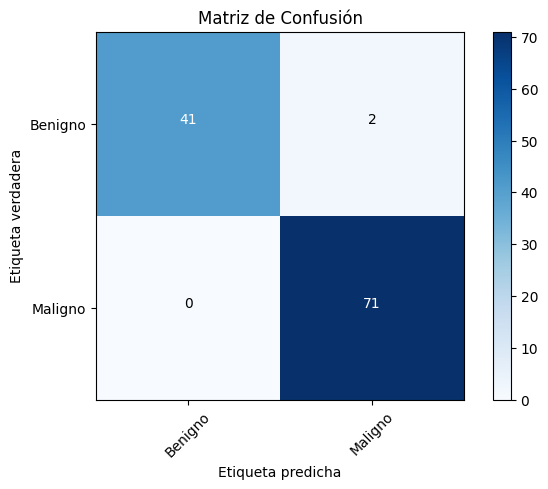

In [63]:
import itertools # Importing the necessary library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Función para visualizar la matriz de confusión
def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y dibuja la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión, sin normalización')

    print(conf_mat)

    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        plt.text(j, i, format(conf_mat[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_mat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')

# Predecir las etiquetas para los datos de prueba
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Convertir las probabilidades a etiquetas binarias (0 o 1)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plot_confusion_matrix(conf_mat, classes=['Benigno', 'Maligno'], title='Matriz de Confusión')
plt.show()

**`Razonamiento`**
Se utiliza una red neuronal secuencial con 3 capas densas.
La función de activación 'relu' se utiliza en las dos primeras capas y 'sigmoid' en la capa de salida para obtener una probabilidad entre 0 y 1.
Se utiliza la función de pérdida 'binary_crossentropy' para problemas de clasificación binaria.
Se utiliza el optimizador 'adam' para ajustar los pesos de la red.
Se entrena el modelo durante 150 épocas con un tamaño de lote de 32.
Se evalúa el modelo con los datos de prueba y se imprime la precisión.
Se obtiene la matriz de confusión para visualizar el rendimiento del modelo.